# **US Baby Names 1880‚Äì2010**

## **1. ƒê·ªãnh nghƒ©a v·∫•n ƒë·ªÅ**

**M√¥ t·∫£**:
+ B·ªô d·ªØ li·ªáu ƒë∆∞·ª£c chia th√†nh c√°c t·ªáp theo t·ª´ng nƒÉm (yob1880.txt ƒë·∫øn yob2010.txt). M·ªói t·ªáp ch·ª©a h√†ng ngh√¨n m·∫´u (d√≤ng), v·ªõi t·ªïng c·ªông h√†ng tri·ªáu m·∫´u tr√™n to√†n b·ªô c√°c t·ªáp (yob1880.txt ƒë·∫øn yob2010.txt).

+ M·ªói d√≤ng (m·∫´u) th·ªÉ hi·ªán m·ªôt t√™n duy nh·∫•t cho m·ªôt gi·ªõi t√≠nh c·ª• th·ªÉ trong nƒÉm ƒë√≥ v√† s·ªë l∆∞·ª£ng tr·∫ª ƒë∆∞·ª£c ƒë·∫∑t t√™n ƒë√≥.

+ C√≥ 3 tr∆∞·ªùng d·ªØ li·ªáu (c·ªôt) trong m·ªói t·ªáp, v√† c√°c t·ªáp g·ªëc kh√¥ng c√≥ ti√™u ƒë·ªÅ (header). Khi ƒë·ªçc d·ªØ li·ªáu ph·∫£i g√°n t√™n cho ch√∫ng: T√™n (Name, ki·ªÉu chu·ªói), Gi·ªõi t√≠nh (Sex, 'F' cho N·ªØ ho·∫∑c 'M' cho Nam), v√† S·ªë l∆∞·ª£ng sinh (Birth, s·ªë nguy√™n).

**D·ªØ li·ªáu ƒë·∫ßu v√†o ban ƒë·∫ßu (T√™n c·ªôt ch√∫ng ta g√°n khi ƒë·ªçc):**
  + name
  + sex
  + births

**D·ªØ li·ªáu ƒë·∫ßu ra kh√¥ng c√≥ m·ªôt c·ªôt "ƒê·∫ßu ra" c·ªë ƒë·ªãnh. Thay v√†o ƒë√≥, c√≥ th·ªÉ t·∫°o ra c√°c ƒë·∫ßu ra (insights) b·∫±ng c√°ch ƒë·∫∑t c√¢u h·ªèi cho d·ªØ li·ªáu:**
  + Xu h∆∞·ªõng ph·ªï bi·∫øn c·ªßa m·ªôt t√™n
  + T·ªïng s·ªë ca sinh m·ªói nƒÉm
  + T·ª∑ l·ªá c·ªßa m·ªôt t√™n (so v·ªõi t·ªïng s·ªë)

## **2. T·ªïng quan v·ªÅ d·ªØ li·ªáu**

### (1) C√†i ƒë·∫∑t th∆∞ vi·ªán v√† k·∫øt n·ªëi b·ªô d·ªØ li·ªáu

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from matplotlib.ticker import MaxNLocator

# 1. Ch·ªâ ƒë·ªãnh ƒë∆∞·ªùng d·∫´n ƒë·∫øn th∆∞ m·ª•c ch·ª©a d·ªØ li·ªáu
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (2) Nh·∫≠p b·ªô d·ªØ li·ªáu

In [ ]:
# 1. Ch·ªâ ƒë·ªãnh ƒë∆∞·ªùng d·∫´n
path = '/content/drive/My Drive/dataset/babynames'

# 2. L·∫•y danh s√°ch t·∫•t c·∫£ c√°c t·ªáp .txt
all_files = glob.glob(os.path.join(path, "yob*.txt"))

# --- (T√ôY CH·ªåN NH∆ØNG N√äN C√ì) S·∫ÆP X·∫æP DANH S√ÅCH T·ªÜP ---
# Gi√∫p qu√° tr√¨nh ƒë·ªçc d·ªÖ ƒëo√°n h∆°n (ph·ª•c v·ª• s·∫Øp x·∫øp tƒÉng d·∫ßn)
all_files.sort()
# ----------------------------------------------------

if not all_files:
    print(f"Kh√¥ng t√¨m th·∫•y t·ªáp .txt n√†o t·∫°i ƒë∆∞·ªùng d·∫´n: {path}")
else:
    print(f"ƒê√£ t√¨m th·∫•y {len(all_files)} t·ªáp. B·∫Øt ƒë·∫ßu ƒë·ªçc...")

    pieces = []

    # 4. V√≤ng l·∫∑p qua t·ª´ng t·ªáp tin
    for file_path in all_files:
        df_temp = pd.read_csv(
            file_path,
            names=['name', 'sex', 'births']
        )

        filename = os.path.basename(file_path)
        year = int(filename[3:7])
        df_temp['year'] = year

        pieces.append(df_temp)

    # 5. G·ªôp t·∫•t c·∫£ c√°c DataFrame
    data = pd.concat(pieces, ignore_index=True)

    # --- S·ª¨A L·ªñI ·ªû ƒê√ÇY: S·∫ÆP X·∫æP L·∫†I TO√ÄN B·ªò DATA FRAME ---
    # S·∫Øp x·∫øp theo NƒÉm (tƒÉng d·∫ßn), r·ªìi Gi·ªõi t√≠nh, r·ªìi S·ªë l∆∞·ª£ng (gi·∫£m d·∫ßn)
    data = data.sort_values(by=['year', 'sex', 'births'], ascending=[True, True, False])
    data = data.reset_index(drop=True) # ƒê·∫∑t l·∫°i ch·ªâ s·ªë sau khi s·∫Øp x·∫øp
    # ------------------------------------------------------

    # 6. Hi·ªÉn th·ªã k·∫øt qu·∫£
    print("\nƒê√£ g·ªôp v√† s·∫Øp x·∫øp xong! ƒê√¢y l√† th√¥ng tin t·ªïng quan:")
    print(data.info())

    # --- C·∫¨P NH·∫¨T C√ÅCH IN (ƒê·ªÇ LU√îN LU√îN ƒê√öNG) ---
    min_year = data['year'].min()
    max_year = data['year'].max()

    print(f"\n--- 5 d√≤ng ƒë·∫ßu ti√™n (NƒÉm: {min_year}) ---")
    print(data.head())

    print(f"\n--- 5 d√≤ng cu·ªëi c√πng (NƒÉm: {max_year}) ---")
    print(data.tail())

ƒê√£ t√¨m th·∫•y 131 t·ªáp. B·∫Øt ƒë·∫ßu ƒë·ªçc...

ƒê√£ g·ªôp v√† s·∫Øp x·∫øp xong! ƒê√¢y l√† th√¥ng tin t·ªïng quan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692484 entries, 0 to 1692483
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB
None

--- 5 d√≤ng ƒë·∫ßu ti√™n (NƒÉm: 1880) ---
        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

--- 5 d√≤ng cu·ªëi c√πng (NƒÉm: 2010) ---
              name sex  births  year
1692479    Zymaire   M       5  2010
1692480     Zyonne   M       5  2010
1692481  Zyquarius   M       5  2010
1692482      Zyran   M       5  2010
1692483      Zzyzx   M       5  2010


## **3. Ph√¢n t√≠ch kh√°m ph√° d·ªØ li·ªáu**

**M·ª•c ti√™u**:
+ Quan s√°t k√≠ch c·ª° d·ªØ li·ªáu (s·ªë l∆∞·ª£ng h√†ng v√† c·ªôt) v√† ki·ªÉu d·ªØ li·ªáu
+ T√≠nh to√†n v·∫πn d·ªØ li·ªáu
+ Ki·ªÉm tra Nan/Null
+ X·ª≠ l√Ω gi√° tr·ªã r·ªóng/thi·∫øu
+ T·∫ßn su·∫•t xu·∫•t hi·ªán

### (1) Nh√¨n s∆° l∆∞·ª£c v·ªÅ d·ªØ li·ªáu

In [ ]:
data

name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1692479    Zymaire   M       5  2010
1692480     Zyonne   M       5  2010
1692481  Zyquarius   M       5  2010
1692482      Zyran   M       5  2010
1692483      Zzyzx   M       5  2010

[1692484 rows x 4 columns]

In [ ]:
# S·ªë d√≤ng v√† c·ªôt
print(f'+ Shape: {data.shape}')

+ Shape: (1692484, 4)


B·ªô d·ªØ li·ªáu g·ªìm 1692484 d√≤ng (1 d√≤ng ƒë·∫°i di·ªán cho t√™n c·ªßa ƒë·ª©a tr·∫ª) v√† 4 c·ªôt d·ªØ li·ªáu(name, sex, count, year)

In [ ]:
# head, tail ƒë·ªÉ xem 5 d√≤ng ƒë·∫ßu v√† 5 d√≤ng cu·ªëi d·ªØ li·ªáu
print("5 d√≤ng ƒë·∫ßu v√† 5 d√≤ng cu·ªëi d·ªØ li·ªáu:\n")
print(f'+ Contents: ')
display(data.head(5))
display(data.tail(5))

5 d√≤ng ƒë·∫ßu v√† 5 d√≤ng cu·ªëi d·ªØ li·ªáu:

+ Contents: 


name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880

name sex  births  year
1692479    Zymaire   M       5  2010
1692480     Zyonne   M       5  2010
1692481  Zyquarius   M       5  2010
1692482      Zyran   M       5  2010
1692483      Zzyzx   M       5  2010

B·ªô d·ªØ li·ªáu ƒë∆∞·ª£c s·∫Øp x·∫øp tƒÉng d·∫ßn theo c√°c nƒÉm (1880 ƒë·∫øn 2010) d·ª±a v√†o c·ªôt 'year'

In [ ]:
# info ƒë·ªÉ xem th√¥ng tin d·ªØ li·ªáu T√™n c·ªôt (Column) S·ªë l∆∞·ª£ng gi√° tr·ªã kh√¥ng r·ªóng Non-Null Count (missing values/NaN).Ki·ªÉu d·ªØ li·ªáu (Dtype)
print("Th√¥ng tin d·ªØ li·ªáu:\n")
print(f'+ Info: \n{data.info()}')

Th√¥ng tin d·ªØ li·ªáu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692484 entries, 0 to 1692483
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.7+ MB
+ Info: 
None


**D·ªØ li·ªáu r·∫•t "s·∫°ch" v√† s·∫µn s√†ng ƒë·ªÉ ph√¢n t√≠ch:**

+ T·ªïng c·ªông g·∫ßn 1.692.484 d√≤ng ƒë√£ ƒë∆∞·ª£c t·∫£i th√†nh c√¥ng.

+ Kh√¥ng c√≥ d·ªØ li·ªáu b·ªã thi·∫øu (null).

+ C√°c ki·ªÉu d·ªØ li·ªáu (Dtypes) ƒë·ªÅu ch√≠nh x√°c: name v√† sex l√† object (chu·ªói), count v√† year l√† int64 (s·ªë nguy√™n)

### (2) Ki·ªÉm tra t√≠nh to√†n v·∫πn c·ªßa d·ªØ li·ªáu
+ D·ªØ li·ªáu c√≥ ch·ª©a d·ªØ li·ªáu tr√πng l·∫∑p kh√¥ng? Hi·ªÉn th·ªã c√°c h√†ng vi ph·∫°m.
+ D·ªØ li·ªáu c√≥ ch·ª©a gi√° tr·ªã Null kh√¥ng? Hi·ªÉn th·ªã c√°c h√†ng vi ph·∫°m.
+ D·ªØ li·ªáu c√≥ ch·ª©a gi√° tr·ªã NaN kh√¥ng? Hi·ªÉn th·ªã c√°c h√†ng vi ph·∫°m.

In [ ]:
from typing_extensions import dataclass_transform
# Ki·ªÉm tra d·ªØ li·ªáu null, nan, tr√πng l·∫∑p(duplicated) v√† d·ªØ li·ªáu thi·∫øu
has_null = data.isnull().sum().any()
has_nan  = data.isna().sum().any()
n_duplicated = data.duplicated().sum()
has_missing_values = data.isnull().sum().any()


print(f'T√≠nh to√†n v·∫πn d·ªØ li·ªáu:')
print(f'+ C√≥ gi√° tr·ªã Null: {has_null}')
if has_null:
    display.display(data[data.isnull().any(axis=1)])
print(f'+ C√≥ gi√° tr·ªã Nan: {has_nan}')
if has_nan:
    display.display(dataclass_transform[data.isna().any(axis=1)])
print(f'+ S·ªë d√≤ng tr√πng: {n_duplicated}')
if has_missing_values:
    print('   -> C√°c d√≤ng ch·ª©a gi√° tr·ªã thi·∫øu:')
    display.display(data[data.isnull().any(axis=1)])

# Ki·ªÉm tra v√† hi·ªÉn th·ªã c√°c d√≤ng b·ªã tr√πng l·∫∑p
print(f'+ S·ªë d√≤ng b·ªã tr√πng l·∫∑p: {n_duplicated}')
if n_duplicated > 0:
    print('   -> C√°c d√≤ng b·ªã tr√πng l·∫∑p (bao g·ªìm c·∫£ d√≤ng g·ªëc ƒë·ªÉ ƒë·ªëi chi·∫øu):')
    # S·ª≠ d·ª•ng keep=False ƒë·ªÉ hi·ªÉn th·ªã t·∫•t c·∫£ c√°c b·∫£n sao c·ªßa m·ªôt d√≤ng b·ªã l·∫∑p
    display.display(data[data.duplicated(keep=False)])

T√≠nh to√†n v·∫πn d·ªØ li·ªáu:
+ C√≥ gi√° tr·ªã Null: False
+ C√≥ gi√° tr·ªã Nan: False
+ S·ªë d√≤ng tr√πng: 0
+ S·ªë d√≤ng b·ªã tr√πng l·∫∑p: 0


### (3) X·ª≠ l√Ω gi√° tr·ªã r·ªóng, kh√¥ng h·ª£p l·ªá

In [ ]:
# + X√≥a b·ªè c·ªôt vi ph·∫°m
# df_train.drop("c·ªôt_vi_ph·∫°m", axis=1)

# + X√≥a b·ªè c√°c d√≤ng vi ph·∫°m
# df_train.dropna(subset=["c·ªôt_vi_ph·∫°m", ...])

# + ƒêi·ªÅn gi√° tr·ªã m·∫∑c ƒë·ªãnh:
# median = df_train["c·ªôt_vi_ph·∫°m"].median()
# df_train["c·ªôt_vi_ph·∫°m"].fillna(median, inplace=True)

print("="*5, "Null Value", "="*5)
display(data.isnull().sum())

print("="*5, "Checking NaN", "="*5)
display(data.isna().sum())

===== Null Value =====


name      0
sex       0
births    0
year      0
dtype: int64

===== Checking NaN =====


name      0
sex       0
births    0
year      0
dtype: int64

B·ªô d·ªØ li·ªáu kh√¥ng ch·ª©a gi√° tr·ªã Null/NaN c·ªßa t·ª´ng d√≤ng thu·ªôc c√°c c·ªôt d·ªØ li·ªáu

### (4) T√≠nh ch·∫•t th·ªëng k√™ tr√™n d·ªØ li·ªáu s·ªë
+ S·ªë l∆∞·ª£ng, Trung b√¨nh, ƒê·ªô l·ªách chu·∫©n, Gi√° tr·ªã nh·ªè nh·∫•t
+ Ph√¢n v·ªã th·ª© 25, Ph√¢n v·ªã th·ª© 50 (Trung v·ªã), Ph√¢n v·ªã th·ª© 75, Gi√° tr·ªã l·ªõn nh·∫•t

In [ ]:
description = data.describe().T
display(description)

count         mean          std     min     25%     50%     75%  \
births  1692484.0   190.634691  1615.922978     5.0     7.0    12.0    32.0   
year    1692484.0  1969.475840    32.819578  1880.0  1946.0  1979.0  1997.0   

            max  
births  99693.0  
year     2010.0

C·ªôt year: ƒê√£ t·∫£i ƒë√∫ng d·ªØ li·ªáu, min l√† 1880 v√† max l√† 2010.

C·ªôt count (S·ªë l∆∞·ª£ng):

+ min = 5.0: ƒêi·ªÅu n√†y cho th·∫•y b·ªô d·ªØ li·ªáu g·ªëc (t·ª´ C·ª•c An sinh X√£ h·ªôi) ch·ªâ ghi l·∫°i c√°c t√™n xu·∫•t hi·ªán √≠t nh·∫•t 5 l·∫ßn trong m·ªôt nƒÉm.

+ 50% (Trung v·ªã) = 12.0: M·ªôt n·ª≠a s·ªë t√™n trong to√†n b·ªô l·ªãch s·ª≠ n√†y ch·ªâ c√≥ 12 l∆∞·ª£t ƒë·∫∑t ho·∫∑c √≠t h∆°n.

+ mean (Trung b√¨nh) = 190.6: Gi√° tr·ªã trung b√¨nh cao h∆°n nhi·ªÅu so v·ªõi trung v·ªã.

+ max = 99,683: C√≥ √≠t nh·∫•t m·ªôt t√™n trong m·ªôt nƒÉm n√†o ƒë√≥ c·ª±c k·ª≥ ph·ªï bi·∫øn.

K·∫øt lu·∫≠n th·ª±c t·∫ø: D·ªØ li·ªáu b·ªã l·ªách r·∫•t n·∫∑ng (positively skewed). H·∫ßu h·∫øt c√°c t√™n (75%) ƒë·ªÅu c√≥ s·ªë l∆∞·ª£ng r·∫•t √≠t (d∆∞·ªõi 32), nh∆∞ng m·ªôt s·ªë √≠t t√™n "si√™u sao" l·∫°i c√≥ s·ªë l∆∞·ª£ng kh·ªïng l·ªì, k√©o gi√° tr·ªã trung b√¨nh l√™n cao.

### (5) T·∫ßn su·∫•t xu·∫•t hi·ªán t·ª´ng t√™n trong d·ªØ li·ªáu "name"

In [ ]:
data["name"].value_counts()

name
Ollie             262
Jesse             262
Marion            262
Leslie            262
Johnnie           262
                 ... 
Minhtri             1
Mirsab              1
Motley              1
Mouhammad           1
Oluwamayomikun      1
Name: count, Length: 88656, dtype: int64

Hi·ªÉu sai v·ªÅ "Count": C·ªôt count ·ªü ƒë√¢y (v√≠ d·ª•: 262) kh√¥ng ph·∫£i l√† s·ªë l∆∞·ª£ng em b√©. N√≥ c√≥ nghƒ©a l√† t√™n "Ollie" xu·∫•t hi·ªán trong 262 d√≤ng kh√°c nhau trong to√†n b·ªô 1.7 tri·ªáu d√≤ng d·ªØ li·ªáu.√ù nghƒ©a c·ªßa 262 (Max): B·ªô d·ªØ li·ªáu k√©o d√†i 131 nƒÉm (1880-2010).

Con s·ªë 262 ch√≠nh l√† $131 \text{ nƒÉm} \times 2 \text{ gi·ªõi t√≠nh}$. ƒêi·ªÅu n√†y cho th·∫•y c√°c t√™n top ƒë·∫ßu (Ollie, Jesse, Marion) l√† nh·ªØng c√°i t√™n unisex (l∆∞·ª°ng t√≠nh) b·ªÅn b·ªâ nh·∫•t, ch√∫ng xu·∫•t hi·ªán cho c·∫£ Nam v√† N·ªØ trong g·∫ßn nh∆∞ m·ªói nƒÉm.√ù nghƒ©a c·ªßa 1 (Min): R·∫•t nhi·ªÅu t√™n (nh∆∞ "Minhtri", "Oluwamayomikun") ch·ªâ c√≥ s·ªë ƒë·∫øm l√† 1.

ƒêi·ªÅu n√†y c√≥ nghƒ©a ch√∫ng l√† nh·ªØng t√™n "ƒë·ªôc l·∫°" (one-hit wonders), ch·ªâ xu·∫•t hi·ªán trong m·ªôt d√≤ng duy nh·∫•t (v√≠ d·ª•: ch·ªâ xu·∫•t hi·ªán cho Nam v√†o nƒÉm 1995) v√† kh√¥ng bao gi·ªù l·∫∑p l·∫°i ·ªü b·∫•t k·ª≥ nƒÉm n√†o ho·∫∑c gi·ªõi t√≠nh n√†o kh√°c.

ƒê·ªô ƒëa d·∫°ng: C√≥ t·ªïng c·ªông 88,656 c√°ch vi·∫øt/ƒë·∫∑t t√™n (spellings) kh√°c nhau, cho th·∫•y s·ª± ƒëa d·∫°ng t√™n g·ªçi c·ª±c k·ª≥ l·ªõn qua 131 nƒÉm.

## **4. M√¥ h√¨nh h√≥a d·ªØ li·ªáu (EDA)**

### (1) Ph√¢n t√≠ch c√°c xu h∆∞·ªõng ƒë·∫∑t t√™n

/tmp/ipython-input-3174757021.py:6: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births_full = data.pivot_table("births", index="year",



ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'selected_names_birth_trends.png'


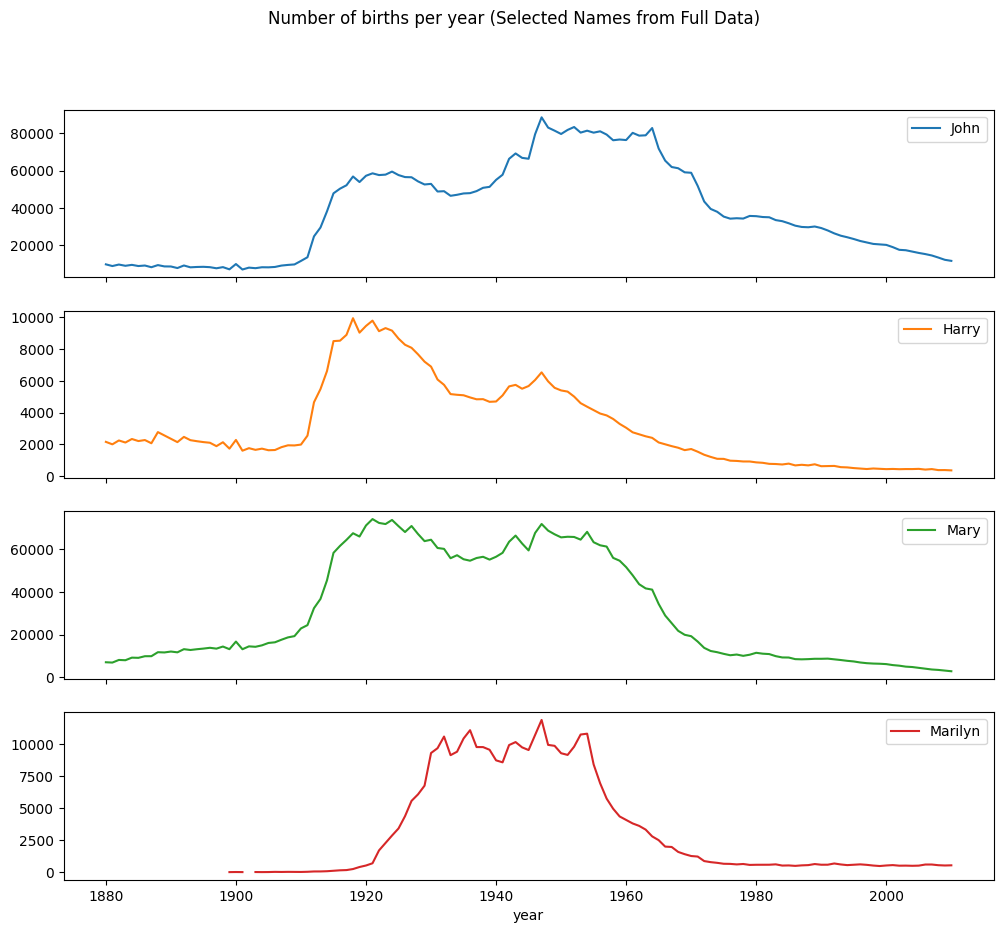

In [ ]:

boys = data[data["sex"] == "M"]

girls = data[data["sex"] == "F"]

# L∆∞u √Ω: Pivot table n√†y s·∫Ω l·ªõn h∆°n nhi·ªÅu v√¨ d√πng to√†n b·ªô d·ªØ li·ªáu
total_births_full = data.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

subset_names = ["John", "Harry", "Mary", "Marilyn"]
# Ki·ªÉm tra xem c√°c c·ªôt c√≥ t·ªìn t·∫°i kh√¥ng tr∆∞·ªõc khi ch·ªçn
existing_names_subset = [name for name in subset_names if name in total_births_full.columns]
if not existing_names_subset:
    print(f"Kh√¥ng t√¨m th·∫•y t√™n n√†o trong {subset_names} trong d·ªØ li·ªáu.")
else:
    subset = total_births_full[existing_names_subset]

    # In [129]: V·∫Ω bi·ªÉu ƒë·ªì cho t·∫≠p h·ª£p con
    # subplot=True v·∫Ω m·ªói t√™n tr√™n m·ªôt bi·ªÉu ƒë·ªì ri√™ng
    # grid=False ƒë·ªÉ lo·∫°i b·ªè l∆∞·ªõi n·ªÅn (t√πy ch·ªçn th·∫©m m·ªπ)
    subset.plot(subplots=True, figsize=(12, 10), grid=False,
                title="Number of births per year (Selected Names from Full Data)")

    # L∆∞u bi·ªÉu ƒë·ªì th√†nh file ·∫£nh (t√πy ch·ªçn)
    plt.savefig('selected_names_birth_trends.png')
    print("\nƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'selected_names_birth_trends.png'")

    # plt.show() # D√πng plt.show() n·∫øu ch·∫°y code c·ª•c b·ªô, kh√¥ng c·∫ßn trong Colab/VM n√†y

**nh·∫≠n x√©t ng·∫Øn g·ªçn v·ªÅ bi·ªÉu ƒë·ªì:**

+ **Xu h∆∞·ªõng bi·∫øn ƒë·ªông:** Bi·ªÉu ƒë·ªì cho th·∫•y s·ª± thay ƒë·ªïi r√µ r·ªát v·ªÅ m·ª©c ƒë·ªô ph·ªï bi·∫øn (s·ªë l∆∞·ª£ng sinh tuy·ªát ƒë·ªëi) c·ªßa b·ªën t√™n ("John", "Harry", "Mary", "Marilyn") trong giai ƒëo·∫°n 1880-2010.

+ **·∫¢nh h∆∞·ªüng Baby Boom:** C√°c t√™n "John" v√† "Mary" ƒë·∫°t ƒë·ªânh cao ph·ªï bi·∫øn r√µ r·ªát trong th·ªùi k·ª≥ Baby Boom (kho·∫£ng 1945-1960). "Harry" c≈©ng c√≥ m·ªôt ƒë·ªânh nh·ªè h∆°n trong giai ƒëo·∫°n n√†y.

+ **·∫¢nh h∆∞·ªüng vƒÉn h√≥a:** T√™n "Marilyn" g·∫ßn nh∆∞ kh√¥ng xu·∫•t hi·ªán cho ƒë·∫øn nh·ªØng nƒÉm 1920, sau ƒë√≥ tƒÉng v·ªçt v√† ƒë·∫°t ƒë·ªânh v√†o nh·ªØng nƒÉm 1950 (tr√πng v·ªõi th·ªùi k·ª≥ n·ªïi ti·∫øng ƒë·ªânh cao c·ªßa Marilyn Monroe), r·ªìi gi·∫£m nhanh ch√≥ng. ƒêi·ªÅu n√†y cho th·∫•y ·∫£nh h∆∞·ªüng m·∫°nh m·∫Ω c·ªßa vƒÉn h√≥a ƒë·∫°i ch√∫ng l√™n vi·ªác ƒë·∫∑t t√™n. üåü

+ **Suy gi·∫£m g·∫ßn ƒë√¢y:** C·∫£ b·ªën t√™n ƒë·ªÅu cho th·∫•y xu h∆∞·ªõng gi·∫£m ƒë√°ng k·ªÉ v·ªÅ s·ªë l∆∞·ª£ng tuy·ªát ƒë·ªëi v√†o cu·ªëi giai ƒëo·∫°n (t·ª´ kho·∫£ng 1960 tr·ªü ƒëi), ph·∫£n √°nh s·ª± ƒëa d·∫°ng h√≥a ng√†y c√†ng tƒÉng trong vi·ªác l·ª±a ch·ªçn t√™n cho tr·∫ª em. üëá


### (2) ƒêo l∆∞·ªùng s·ª± tƒÉng ƒëa d·∫°ng trong ƒë·∫∑t t√™n

In [ ]:
# Th√™m c·ªôt 'rank' b·∫±ng c√°ch x·∫øp h·∫°ng 'births' trong t·ª´ng nh√≥m (year, sex)
data['rank'] = data.groupby(['year', 'sex'])['births'].rank(method='first', ascending=False)

In [ ]:
# T√≠nh t·ª∑ l·ªá sinh theo t·ª´ng t√™n so v·ªõi t·ªïng s·ªë tr·∫ª sinh ra trong nƒÉm ƒë√≥ theo gi·ªõi t√≠nh
data['prop'] = data.groupby(['year', 'sex'])['births'].transform(lambda x: x / x.sum())

# T·∫°o DataFrame top1000_data
top1000_data = data[data['rank'] <= 1000].copy()

--- B·∫£ng t·ªïng h·ª£p t·ª∑ l·ªá top 1000 ---


sex          F         M
year                    
1880  1.000000  0.997375
1881  1.000000  1.000000
1882  0.998702  0.995646
1883  0.997596  0.998566
1884  0.993156  0.994539
...        ...       ...
2006  0.753016  0.860273
2007  0.745831  0.855074
2008  0.740790  0.849958
2009  0.737152  0.845189
2010  0.736420  0.842798

[131 rows x 2 columns]


ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'top1000_proportion_trends.png'


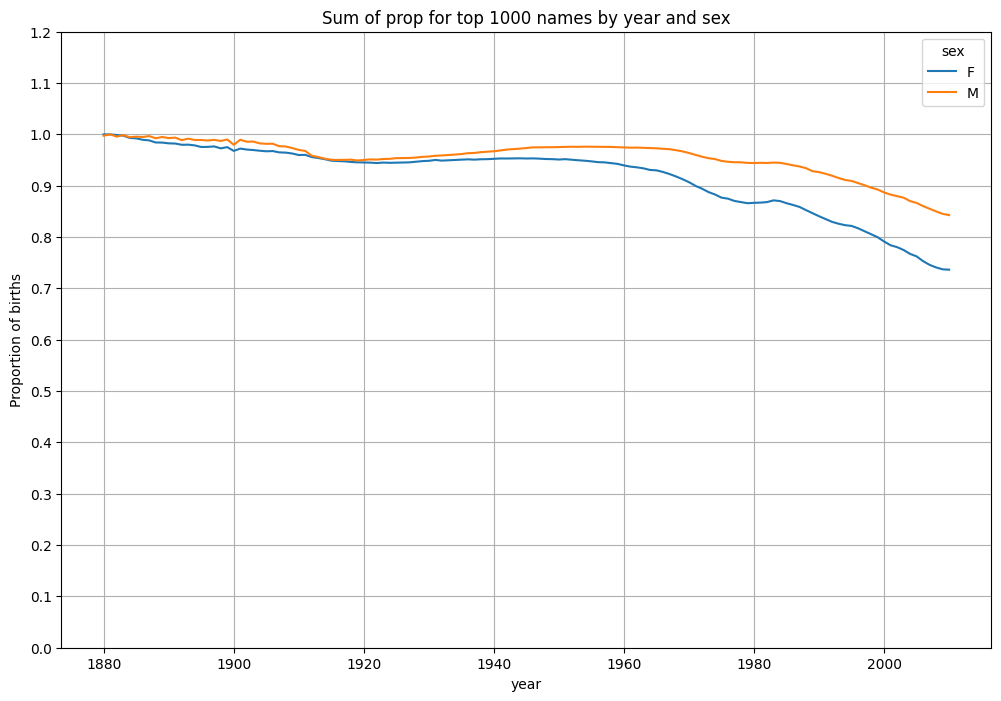

In [ ]:

# 1. L·ªçc ra top 1000 t√™n ph·ªï bi·∫øn nh·∫•t cho m·ªói nƒÉm v√† gi·ªõi t√≠nh
# Ch√∫ng ta ƒë√£ t·∫°o c·ªôt 'rank' ·ªü b∆∞·ªõc tr∆∞·ªõc
top1000_data = data[data['rank'] <= 1000]

# Ki·ªÉm tra xem c√≥ d·ªØ li·ªáu top 1000 kh√¥ng
if top1000_data.empty:
    print("Kh√¥ng t√¨m th·∫•y d·ªØ li·ªáu top 1000. H√£y ƒë·∫£m b·∫£o c·ªôt 'rank' ƒë√£ ƒë∆∞·ª£c t√≠nh to√°n ch√≠nh x√°c.")
else:
    # In [131]: T·∫°o pivot table t·ªïng h·ª£p t·ª∑ l·ªá (prop) c·ªßa top 1000 t√™n
    # theo nƒÉm v√† gi·ªõi t√≠nh
    table_prop_top1000 = top1000_data.pivot_table("prop", index="year",
                                                 columns="sex", aggfunc="sum") # S·ª≠ d·ª•ng "sum" thay v√¨ sum

    # Ki·ªÉm tra pivot table (t√πy ch·ªçn)
    print("--- B·∫£ng t·ªïng h·ª£p t·ª∑ l·ªá top 1000 ---")
    display(table_prop_top1000)

    # In [132]: V·∫Ω bi·ªÉu ƒë·ªì
    # T·∫°o c√°c ƒëi·ªÉm chia cho tr·ª•c y t·ª´ 0 ƒë·∫øn 1.2 v·ªõi 13 ƒëi·ªÉm (kho·∫£ng c√°ch 0.1)
    yticks = np.linspace(0, 1.2, 13)

    table_prop_top1000.plot(title="Sum of prop for top 1000 names by year and sex",
                            yticks=yticks,
                            figsize=(12, 8), # TƒÉng k√≠ch th∆∞·ªõc ƒë·ªÉ d·ªÖ ƒë·ªçc h∆°n
                            grid=True) # Th√™m l∆∞·ªõi n·ªÅn

    # T√πy ch·ªânh th√™m cho bi·ªÉu ƒë·ªì
    plt.ylabel("Proportion of births") # Th√™m nh√£n tr·ª•c y r√µ r√†ng h∆°n
    plt.ylim(0, 1.2) # ƒê·∫£m b·∫£o gi·ªõi h·∫°n tr·ª•c y ƒë√∫ng

    # L∆∞u bi·ªÉu ƒë·ªì th√†nh file ·∫£nh
    plt.savefig('top1000_proportion_trends.png')
    print("\nƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'top1000_proportion_trends.png'")

    # plt.show() # Kh√¥ng c·∫ßn thi·∫øt trong m√¥i tr∆∞·ªùng n√†y

**nh·∫≠n x√©t ng·∫Øn g·ªçn v·ªÅ bi·ªÉu ƒë·ªì:**

+ **Xu h∆∞·ªõng ch√≠nh:** Bi·ªÉu ƒë·ªì cho th·∫•y r√µ r√†ng r·∫±ng s·ª± ƒëa d·∫°ng trong vi·ªác ƒë·∫∑t t√™n ng√†y c√†ng tƒÉng theo th·ªùi gian cho c·∫£ hai gi·ªõi t√≠nh. üìà

+ **Qu√° kh·ª©:** V√†o cu·ªëi th·∫ø k·ª∑ 19 (kho·∫£ng 1880), 1000 t√™n ph·ªï bi·∫øn nh·∫•t chi·∫øm g·∫ßn nh∆∞ to√†n b·ªô (g·∫ßn 100%) s·ªë l∆∞·ª£ng tr·∫ª em ƒë∆∞·ª£c sinh ra, cho th·∫•y s·ª± t·∫≠p trung cao ƒë·ªô v√†o c√°c t√™n th√¥ng th∆∞·ªùng.

+ **Hi·ªán t·∫°i:** T·ª∑ l·ªá n√†y gi·∫£m d·∫ßn, ƒë·∫∑c bi·ªát l√† t·ª´ gi·ªØa th·∫ø k·ª∑ 20 tr·ªü ƒëi. ƒê·∫øn nƒÉm 2010, 1000 t√™n ph·ªï bi·∫øn nh·∫•t ch·ªâ chi·∫øm kho·∫£ng 75% s·ªë b√© g√°i v√† kho·∫£ng 85% s·ªë b√© trai.

+ **Kh√°c bi·ªát gi·ªõi t√≠nh:** Xu h∆∞·ªõng ƒëa d·∫°ng h√≥a t√™n g·ªçi m·∫°nh m·∫Ω h∆°n ·ªü b√© g√°i so v·ªõi b√© trai, th·ªÉ hi·ªán qua ƒë∆∞·ªùng bi·ªÉu ƒë·ªì ('F') d·ªëc xu·ªëng nhanh h∆°n ƒë∆∞·ªùng ('M') trong nh·ªØng th·∫≠p k·ª∑ g·∫ßn ƒë√¢y.

### (3) T·ªïng h·ª£p d·ªØ li·ªáu theo c·∫•p ƒë·ªô nƒÉm('year') v√† gi·ªõi t√≠nh('sex') (s·ª≠ d·ª•ng pivot_table)

/tmp/ipython-input-390346946.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = data.pivot_table("births", index="year", columns="sex", aggfunc=sum)


sex         F        M
year                  
2006  1900673  2054644
2007  1921941  2074707
2008  1890111  2039317
2009  1836214  1982609
2010  1776636  1917792


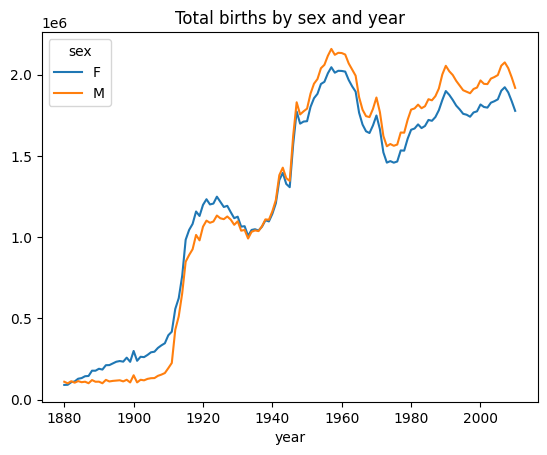

In [ ]:
# In [112]: T·∫°o pivot table
total_births = data.pivot_table("births", index="year", columns="sex", aggfunc=sum)

# In [113]: Hi·ªÉn th·ªã 5 d√≤ng cu·ªëi c·ªßa b·∫£ng (t√πy ch·ªçn)
print(total_births.tail())

# In [114]: V·∫Ω bi·ªÉu ƒë·ªì
total_births.plot(title="Total births by sex and year")

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

**Bi·ªÉu ƒë·ªì tr·ª±c quan h√≥a k·∫øt qu·∫£ n√†y, cho th·∫•y:**

+ Xu h∆∞·ªõng sinh tƒÉng d·∫ßn t·ª´ 1880 ƒë·∫øn 2010.

+ C√≥ m·ªôt ƒë·ª£t b√πng n·ªï sinh (baby boom) r√µ r·ªát ƒë·∫°t ƒë·ªânh v√†o kho·∫£ng nƒÉm 1960.

+ M·ªôt quan s√°t th√∫ v·ªã l√† ƒë∆∞·ªùng 'M' (Nam) lu√¥n n·∫±m tr√™n ƒë∆∞·ªùng 'F' (N·ªØ), cho th·∫•y s·ªë l∆∞·ª£ng b√© trai sinh ra h√†ng nƒÉm lu√¥n cao h∆°n m·ªôt ch√∫t so v·ªõi b√© g√°i.

### (4) S·ªë l∆∞·ª£ng t√™n ph·ªï bi·∫øn trong top 50% (50% s·ªë l∆∞·ª£ng ng∆∞·ªùi c√≥ t√™n n√†y bao g·ªìm nam('M') v√† n·ªØ('F') )

In [ ]:

# Ki·ªÉm tra l·∫°i xem top1000_data c√≥ t·ªìn t·∫°i v√† kh√¥ng r·ªóng kh√¥ng
if 'top1000_data' not in locals() or top1000_data.empty:
    print("DataFrame 'top1000_data' ch∆∞a ƒë∆∞·ª£c t·∫°o ho·∫∑c r·ªóng.")
    print("ƒêang t·∫°o l·∫°i 'top1000_data' t·ª´ 'data'...")
    if 'rank' in data.columns:
        top1000_data = data[data['rank'] <= 1000].copy() # D√πng .copy() ƒë·ªÉ tr√°nh SettingWithCopyWarning
        if top1000_data.empty:
            print("Kh√¥ng th·ªÉ t·∫°o 'top1000_data'. Ki·ªÉm tra l·∫°i c·ªôt 'rank'.")
            # G√°n DataFrame r·ªóng ƒë·ªÉ tr√°nh l·ªói sau ƒë√≥ n·∫øu kh√¥ng t·∫°o ƒë∆∞·ª£c
            diversity = pd.DataFrame()
        else:
            print("'top1000_data' ƒë√£ ƒë∆∞·ª£c t·∫°o l·∫°i.")
    else:
        print("C·ªôt 'rank' kh√¥ng t·ªìn t·∫°i trong 'data'. Kh√¥ng th·ªÉ t·∫°o 'top1000_data'.")
        # G√°n DataFrame r·ªóng ƒë·ªÉ tr√°nh l·ªói sau ƒë√≥ n·∫øu kh√¥ng t·∫°o ƒë∆∞·ª£c
        diversity = pd.DataFrame()
else:
    print("'top1000_data' ƒë√£ t·ªìn t·∫°i.")

# Ch·ªâ th·ª±c hi·ªán t√≠nh to√°n n·∫øu top1000_data h·ª£p l·ªá
if 'diversity' not in locals() or diversity.empty: # Ki·ªÉm tra n·∫øu diversity ch∆∞a ƒë∆∞·ª£c t·∫°o ho·∫∑c r·ªóng
    if 'top1000_data' in locals() and not top1000_data.empty:
        # In [141]: ƒê·ªãnh nghƒ©a h√†m t√≠nh s·ªë l∆∞·ª£ng t√™n ƒë·∫°t quantile q
        def get_quantile_count(group, q=0.5):
            # S·∫Øp x·∫øp nh√≥m theo t·ª∑ l·ªá gi·∫£m d·∫ßn
            group = group.sort_values("prop", ascending=False)
            # T√≠nh t·ªïng t√≠ch l≈©y c·ªßa t·ª∑ l·ªá v√† t√¨m v·ªã tr√≠ c·∫ßn ch√®n q
            # searchsorted tr·∫£ v·ªÅ ch·ªâ s·ªë (b·∫Øt ƒë·∫ßu t·ª´ 0)
            # C·ªông 1 ƒë·ªÉ ra s·ªë l∆∞·ª£ng t√™n
            return group.prop.cumsum().searchsorted(q, side='right') + 1 # side='right' x·ª≠ l√Ω tr∆∞·ªùng h·ª£p b·∫±ng q

        # In [142]: √Åp d·ª•ng h√†m cho t·ª´ng nh√≥m nƒÉm/gi·ªõi t√≠nh trong top1000_data
        print("ƒêang t√≠nh to√°n ƒë·ªô ƒëa d·∫°ng...")
        diversity_series = top1000_data.groupby(["year", "sex"]).apply(get_quantile_count, q=0.5) # Truy·ªÅn q=0.5 t∆∞·ªùng minh

        # Chuy·ªÉn ƒë·ªïi Series k·∫øt qu·∫£ th√†nh DataFrame (unstack)
        diversity = diversity_series.unstack('sex') # Ch·ªâ ƒë·ªãnh c·ªôt c·∫ßn unstack

        # In [143]: Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu c·ªßa k·∫øt qu·∫£ (t√πy ch·ªçn)
        print("\n--- 5 d√≤ng ƒë·∫ßu c·ªßa DataFrame 'diversity' ---")
        display(diversity.head())
    else:
        print("Kh√¥ng th·ªÉ t√≠nh to√°n 'diversity' do thi·∫øu 'top1000_data'.")

'top1000_data' ƒë√£ t·ªìn t·∫°i.



ƒêang v·∫Ω bi·ªÉu ƒë·ªì ƒë·ªô ƒëa d·∫°ng...
ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'name_diversity_top50_percent.png'


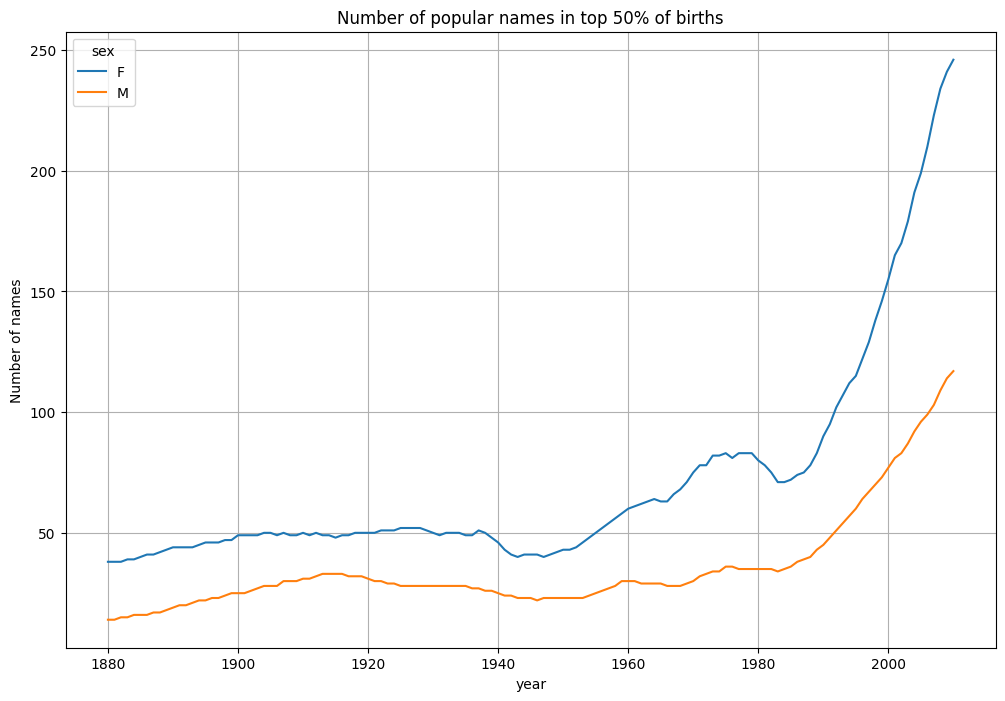

In [ ]:

# Ki·ªÉm tra xem DataFrame 'diversity' ƒë√£ ƒë∆∞·ª£c t√≠nh to√°n th√†nh c√¥ng ch∆∞a
if 'diversity' in locals() and not diversity.empty:
    # In [144]: V·∫Ω bi·ªÉu ƒë·ªì t·ª´ DataFrame 'diversity'
    print("\nƒêang v·∫Ω bi·ªÉu ƒë·ªì ƒë·ªô ƒëa d·∫°ng...")
    diversity.plot(title="Number of popular names in top 50% of births",
                   figsize=(12, 8), # TƒÉng k√≠ch th∆∞·ªõc
                   grid=True) # Th√™m l∆∞·ªõi

    # T√πy ch·ªânh th√™m
    plt.ylabel("Number of names") # Th√™m nh√£n tr·ª•c y

    # L∆∞u bi·ªÉu ƒë·ªì
    plt.savefig('name_diversity_top50_percent.png')
    print("ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'name_diversity_top50_percent.png'")

    # plt.show() # Kh√¥ng c·∫ßn thi·∫øt trong m√¥i tr∆∞·ªùng n√†y
else:
    print("Kh√¥ng th·ªÉ v·∫Ω bi·ªÉu ƒë·ªì v√¨ DataFrame 'diversity' kh√¥ng t·ªìn t·∫°i ho·∫∑c r·ªóng.")

**nh·∫≠n x√©t v·ªÅ bi·ªÉu ƒë·ªì:**

+ **X√°c nh·∫≠n xu h∆∞·ªõng:** Bi·ªÉu ƒë·ªì n√†y x√°c nh·∫≠n m·∫°nh m·∫Ω r·∫±ng s·ª± ƒëa d·∫°ng trong vi·ªác ƒë·∫∑t t√™n ƒëang tƒÉng l√™n ƒë√°ng k·ªÉ theo th·ªùi gian cho c·∫£ hai gi·ªõi.

+ **√ù nghƒ©a:** C·∫ßn ng√†y c√†ng nhi·ªÅu t√™n h∆°n ƒë·ªÉ chi·∫øm ƒë∆∞·ª£c 50% t·ªïng s·ªë tr·∫ª em sinh ra. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† s·ª± ph·ªï bi·∫øn kh√¥ng c√≤n t·∫≠p trung v√†o m·ªôt s·ªë √≠t t√™n nh∆∞ tr∆∞·ªõc ƒë√¢y n·ªØa.

+ **Qu√° kh·ª©:** V√†o nƒÉm 1880, ch·ªâ c·∫ßn kho·∫£ng 14 t√™n b√© trai v√† 38 t√™n b√© g√°i l√† ƒë√£ chi·∫øm 50% s·ªë l∆∞·ª£ng sinh.

+ **Hi·ªán t·∫°i:** ƒê·∫øn nƒÉm 2010, con s·ªë n√†y ƒë√£ tƒÉng v·ªçt l√™n kho·∫£ng 120 t√™n b√© trai v√† g·∫ßn 250 t√™n b√© g√°i.

+ **Kh√°c bi·ªát gi·ªõi t√≠nh r√µ r·ªát:** S·ª± gia tƒÉng ƒëa d·∫°ng t√™n g·ªçi di·ªÖn ra m·∫°nh m·∫Ω h∆°n nhi·ªÅu ·ªü b√© g√°i so v·ªõi b√© trai, ƒë·∫∑c bi·ªát l√† t·ª´ kho·∫£ng nƒÉm 1980 tr·ªü ƒëi

### (5) Cu·ªôc c√°ch m·∫°ng ‚Äúch·ªØ c√°i cu·ªëi c√πng‚Äù

In [ ]:

# 1. ƒê·ªãnh nghƒ©a h√†m l·∫•y ch·ªØ c√°i cu·ªëi
def get_last_letter(x):
    # Ki·ªÉm tra xem x c√≥ ph·∫£i l√† chu·ªói kh√¥ng v√† kh√¥ng r·ªóng
    if isinstance(x, str) and len(x) > 0:
        return x[-1]
    return None # Ho·∫∑c tr·∫£ v·ªÅ gi√° tr·ªã kh√°c n·∫øu t√™n kh√¥ng h·ª£p l·ªá

# 2. T·∫°o Series ch·ª©a ch·ªØ c√°i cu·ªëi
# S·ª≠ d·ª•ng .dropna() ƒë·ªÉ lo·∫°i b·ªè c√°c tr∆∞·ªùng h·ª£p t√™n kh√¥ng h·ª£p l·ªá (n·∫øu c√≥)
last_letters = data["name"].map(get_last_letter).dropna()
last_letters.name = "last_letter" # ƒê·∫∑t t√™n cho Series

# 3. T·∫°o pivot table t·ªïng h·ª£p s·ªë sinh theo ch·ªØ c√°i cu·ªëi, gi·ªõi t√≠nh v√† nƒÉm
# D√πng aggfunc="sum" ƒë·ªÉ r√µ r√†ng h∆°n
print("ƒêang t·∫°o pivot table l·ªõn...")
table = data.pivot_table("births", index=last_letters,
                           columns=["sex", "year"], aggfunc="sum") # S·ª≠ d·ª•ng "sum"

# 4. Ch·ªçn c√°c nƒÉm ƒë·∫°i di·ªán (1910, 1960, 2010)
# level="year" ch·ªâ ƒë·ªãnh r·∫±ng ch√∫ng ta ƒëang ch·ªçn c·ªôt ·ªü c·∫•p ƒë·ªô 'year'
try:
    subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
except KeyError as e:
    print(f"L·ªói: Kh√¥ng t√¨m th·∫•y m·ªôt trong c√°c nƒÉm c·ªôt trong pivot table. L·ªói: {e}")
    # G√°n DataFrame r·ªóng ƒë·ªÉ tr√°nh l·ªói sau ƒë√≥
    letter_prop = pd.DataFrame()
else:
    # 5. T√≠nh t·ªïng s·ªë sinh cho c√°c c·ªôt trong subtable ƒë·ªÉ chu·∫©n h√≥a
    subtable_sum = subtable.sum()
    # Ki·ªÉm tra xem c√≥ t·ªïng n√†o b·∫±ng 0 kh√¥ng ƒë·ªÉ tr√°nh l·ªói chia cho 0
    if (subtable_sum == 0).any():
        print("C·∫£nh b√°o: C√≥ √≠t nh·∫•t m·ªôt c·ªôt (nƒÉm/gi·ªõi t√≠nh) c√≥ t·ªïng s·ªë sinh b·∫±ng 0.")
        # Thay th·∫ø 0 b·∫±ng NaN ƒë·ªÉ tr√°nh l·ªói chia, ho·∫∑c x·ª≠ l√Ω kh√°c n·∫øu c·∫ßn
        subtable_sum.replace(0, np.nan, inplace=True)

    # 6. T√≠nh t·ª∑ l·ªá ch·ªØ c√°i cu·ªëi (chu·∫©n h√≥a theo c·ªôt)
    if not subtable_sum.isnull().all(): # Ch·ªâ t√≠nh n·∫øu c√≥ √≠t nh·∫•t m·ªôt t·ªïng kh√°c NaN
       print("ƒêang t√≠nh to√°n t·ª∑ l·ªá...")
       letter_prop = subtable / subtable_sum
       # ƒêi·ªÅn 0 cho c√°c gi√° tr·ªã NaN c√≥ th·ªÉ xu·∫•t hi·ªán n·∫øu t√™n kh√¥ng c√≥ trong nƒÉm ƒë√≥
       letter_prop.fillna(0, inplace=True)

       # 7. Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu c·ªßa b·∫£ng t·ª∑ l·ªá (t√πy ch·ªçn)
       print("\n--- 5 d√≤ng ƒë·∫ßu c·ªßa b·∫£ng t·ª∑ l·ªá ch·ªØ c√°i cu·ªëi (letter_prop) ---")
       display(letter_prop.head())
    else:
       print("Kh√¥ng th·ªÉ t√≠nh t·ª∑ l·ªá do t·∫•t c·∫£ c√°c t·ªïng ƒë·ªÅu b·∫±ng 0 ho·∫∑c NaN.")
       letter_prop = pd.DataFrame() # G√°n DataFrame r·ªóng

ƒêang t·∫°o pivot table l·ªõn...
ƒêang t√≠nh to√°n t·ª∑ l·ªá...

--- 5 d√≤ng ƒë·∫ßu c·ªßa b·∫£ng t·ª∑ l·ªá ch·ªØ c√°i cu·ªëi (letter_prop) ---


sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273388  0.341890  0.381239  0.005031  0.002447  0.015067
b            0.000000  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113857  0.122937  0.023394
e            0.336943  0.215131  0.178430  0.147599  0.083838  0.067968


ƒêang v·∫Ω bi·ªÉu ƒë·ªì t·ª∑ l·ªá ch·ªØ c√°i cu·ªëi...
ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'last_letter_proportion_bar_chart.png'


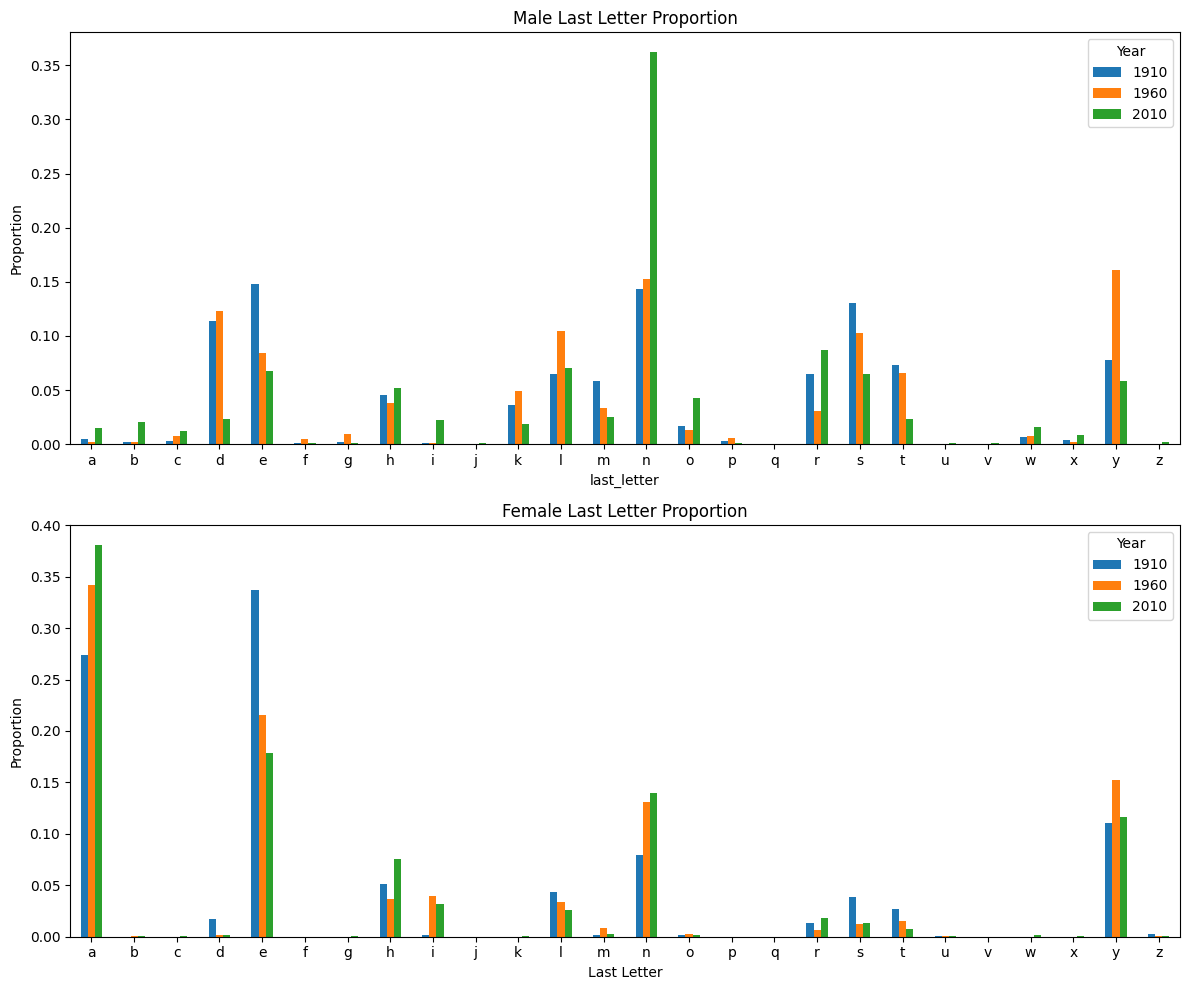

In [ ]:

# Ki·ªÉm tra xem DataFrame 'letter_prop' ƒë√£ ƒë∆∞·ª£c t√≠nh to√°n th√†nh c√¥ng ch∆∞a
if 'letter_prop' in locals() and not letter_prop.empty:
    print("\nƒêang v·∫Ω bi·ªÉu ƒë·ªì t·ª∑ l·ªá ch·ªØ c√°i cu·ªëi...")
    # T·∫°o 2 bi·ªÉu ƒë·ªì con (2 h√†ng, 1 c·ªôt)
    fig, axes = plt.subplots(2, 1, figsize=(12, 10)) # K√≠ch th∆∞·ªõc l·ªõn h∆°n m·ªôt ch√∫t

    # V·∫Ω bi·ªÉu ƒë·ªì c·ªôt cho Nam ('M')
    if 'M' in letter_prop.columns.get_level_values('sex'):
        letter_prop['M'].plot(kind="bar", rot=0, ax=axes[0], title="Male Last Letter Proportion")
        axes[0].set_ylabel("Proportion") # Th√™m nh√£n tr·ª•c y
        axes[0].set_ylim(0) # ƒê·∫£m b·∫£o tr·ª•c y b·∫Øt ƒë·∫ßu t·ª´ 0
        axes[0].legend(title="Year") # Th√™m ch√∫ gi·∫£i cho nƒÉm
    else:
        axes[0].set_title("Male Last Letter Proportion (No Data)")

    # V·∫Ω bi·ªÉu ƒë·ªì c·ªôt cho N·ªØ ('F')
    if 'F' in letter_prop.columns.get_level_values('sex'):
        letter_prop['F'].plot(kind="bar", rot=0, ax=axes[1], title="Female Last Letter Proportion")
        axes[1].set_ylabel("Proportion") # Th√™m nh√£n tr·ª•c y
        axes[1].set_xlabel("Last Letter") # Th√™m nh√£n tr·ª•c x
        axes[1].set_ylim(0) # ƒê·∫£m b·∫£o tr·ª•c y b·∫Øt ƒë·∫ßu t·ª´ 0
        # legend=False # B·ªè ch√∫ gi·∫£i n·∫øu kh√¥ng c·∫ßn thi·∫øt ho·∫∑c d√πng legend(title="Year")
        axes[1].legend(title="Year")
    else:
        axes[1].set_title("Female Last Letter Proportion (No Data)")


    # ƒêi·ªÅu ch·ªânh layout
    plt.tight_layout()

    # L∆∞u bi·ªÉu ƒë·ªì
    plt.savefig('last_letter_proportion_bar_chart.png')
    print("ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'last_letter_proportion_bar_chart.png'")

    # plt.show() # Kh√¥ng c·∫ßn thi·∫øt trong m√¥i tr∆∞·ªùng n√†y
else:
    print("Kh√¥ng th·ªÉ v·∫Ω bi·ªÉu ƒë·ªì v√¨ DataFrame 'letter_prop' kh√¥ng t·ªìn t·∫°i ho·∫∑c r·ªóng.")

**nh·∫≠n x√©t v·ªÅ bi·ªÉu ƒë·ªì:**

+ **X√°c nh·∫≠n "Cu·ªôc c√°ch m·∫°ng ch·ªØ c√°i cu·ªëi":** Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán r√µ r√†ng s·ª± thay ƒë·ªïi ƒë√°ng k·ªÉ trong t·ª∑ l·ªá c√°c ch·ªØ c√°i cu·ªëi ph·ªï bi·∫øn c·ªßa t√™n b√© trai v√† b√© g√°i qua c√°c nƒÉm 1910, 1960 v√† 2010. üîÑ

+ **B√© trai:**

  + **NƒÉm 1910:** C√°c ch·ªØ c√°i cu·ªëi ph·ªï bi·∫øn nh·∫•t l√† 'e', 'd', 'n', 'r', 's', 't', 'y'.

  + **NƒÉm 1960:** 'd' v√† 'y' v·∫´n m·∫°nh, nh∆∞ng 'n' b·∫Øt ƒë·∫ßu tƒÉng.

  + **NƒÉm 2010:** 'n' tr·ªü th√†nh ch·ªØ c√°i cu·ªëi th·ªëng tr·ªã tuy·ªát ƒë·ªëi, chi·∫øm h∆°n 35% t√™n b√© trai. C√°c ch·ªØ c√°i truy·ªÅn th·ªëng nh∆∞ 'd', 'r', 's', 't' ƒë√£ gi·∫£m ƒë√°ng k·ªÉ t·ª∑ l·ªá. üë¶‚û°Ô∏èn

+ **B√© g√°i:**

  + **NƒÉm 1910:** 'e' v√† 'a' l√† ph·ªï bi·∫øn nh·∫•t, c√πng v·ªõi 'y'.

  + **NƒÉm 1960:** 'a' v√† 'e' v·∫´n d·∫´n ƒë·∫ßu, 'y' c≈©ng tƒÉng.

  + **NƒÉm 2010:** 'a' tr·ªü n√™n v∆∞·ª£t tr·ªôi, chi·∫øm g·∫ßn 40% t√™n b√© g√°i. T·ª∑ l·ªá c·ªßa 'e' gi·∫£m m·∫°nh. 'y' v·∫´n gi·ªØ v·ªã tr√≠ ƒë√°ng k·ªÉ. üëß‚û°Ô∏èa

**K·∫øt lu·∫≠n:** Xu h∆∞·ªõng ƒë·∫∑t t√™n ƒë√£ thay ƒë·ªïi r√µ r·ªát, ƒë·∫∑c bi·ªát l√† s·ª± tr·ªói d·∫≠y m·∫°nh m·∫Ω c·ªßa t√™n k·∫øt th√∫c b·∫±ng 'n' cho b√© trai v√† 'a' cho b√© g√°i trong nh·ªØng th·∫≠p k·ª∑ g·∫ßn ƒë√¢y.

### (6) T·ª∑ l·ªá b√© trai sinh ra c√≥ t√™n k·∫øt th√∫c b·∫±ng ch·ªØ d/n/y theo th·ªùi gian

In [ ]:
letter_prop=table/table.sum()
dny_ts=letter_prop.loc[["d","n","y"],"M"].T
dny_ts.head()

last_letter         d         n         y
year                                     
1880         0.083057  0.153217  0.075763
1881         0.083246  0.153221  0.077459
1882         0.085332  0.149561  0.077538
1883         0.084053  0.151656  0.079149
1884         0.086122  0.149927  0.080408

<Axes: xlabel='year'>

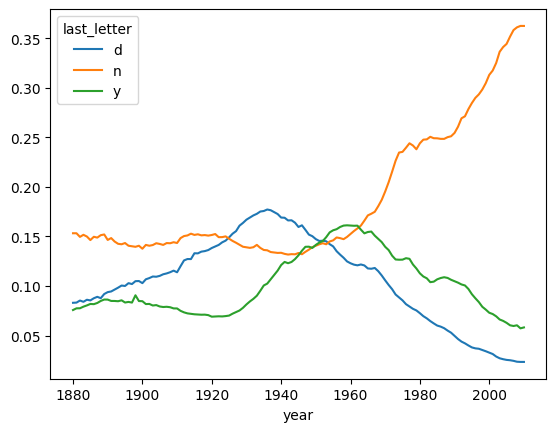

In [ ]:
dny_ts.plot()

**nh·∫≠n x√©t ng·∫Øn g·ªçn v·ªÅ bi·ªÉu ƒë·ªì:**

+ **Xu h∆∞·ªõng ch√≠nh:** S·ª± thay ƒë·ªïi l·ªõn nh·∫•t l√† s·ª± gia tƒÉng m·∫°nh m·∫Ω c·ªßa c√°c t√™n k·∫øt th√∫c b·∫±ng ch·ªØ 'n' (m√†u cam), b·∫Øt ƒë·∫ßu t·ª´ kho·∫£ng nh·ªØng nƒÉm 1940 v√† ti·∫øp t·ª•c tƒÉng v·ªçt, tr·ªü th√†nh ph·ªï bi·∫øn nh·∫•t trong ba lo·∫°i n√†y v√†o cu·ªëi bi·ªÉu ƒë·ªì.

+ **Ch·ªØ 'd' (m√†u xanh d∆∞∆°ng):** T·ª´ng ph·ªï bi·∫øn h∆°n 'y', ƒë·∫°t ƒë·ªânh v√†o kho·∫£ng nƒÉm 1940, nh∆∞ng sau ƒë√≥ ƒë√£ gi·∫£m s√∫t li√™n t·ª•c v√† tr·ªü n√™n √≠t ph·ªï bi·∫øn nh·∫•t.

+ **Ch·ªØ 'y' (m√†u xanh l√°):** C√≥ m·ªôt giai ƒëo·∫°n ph·ªï bi·∫øn v√†o gi·ªØa th·∫ø k·ª∑ 20 (ƒë·∫°t ƒë·ªânh quanh nƒÉm 1960), nh∆∞ng sau ƒë√≥ c≈©ng c√≥ xu h∆∞·ªõng gi·∫£m d·∫ßn.

### (7) T·ª∑ l·ªá t√™n gi·ªëng Lesley theo gi·ªõi t√≠nh nam/n·ªØ theo th·ªùi gian

In [ ]:

# In [159]: L·∫•y t·∫•t c·∫£ c√°c t√™n duy nh·∫•t t·ª´ DataFrame 'data'
all_names = pd.Series(data["name"].unique())

# In [160]: T√¨m c√°c t√™n ch·ª©a chu·ªói "Lesl" (kh√¥ng ph√¢n bi·ªát ch·ªØ hoa/th∆∞·ªùng)
# D√πng str.contains v·ªõi case=False
lesley_like = all_names[all_names.str.contains("Lesl", case=False, na=False)] # na=False ƒë·ªÉ b·ªè qua NaN n·∫øu c√≥

# In [161]: Hi·ªÉn th·ªã c√°c t√™n t√¨m ƒë∆∞·ª£c (t√πy ch·ªçn)
print("--- C√°c t√™n ch·ª©a 'Lesl' t√¨m th·∫•y trong d·ªØ li·ªáu ---")
print(lesley_like)

# In [162]: L·ªçc DataFrame 'data' ƒë·ªÉ ch·ªâ gi·ªØ l·∫°i c√°c t√™n n√†y
# D√πng isin ƒë·ªÉ ki·ªÉm tra
filtered_lesl = data[data["name"].isin(lesley_like)].copy() # D√πng .copy()

# In [163]: (T√πy ch·ªçn) T√≠nh t·ªïng s·ªë sinh cho m·ªói t√™n 'Lesl'
print("\n--- T·ªïng s·ªë sinh cho m·ªói t√™n ch·ª©a 'Lesl' ---")
display(filtered_lesl.groupby("name")["births"].sum())

# In [164]: T·∫°o pivot table t·ªïng h·ª£p s·ªë sinh theo nƒÉm v√† gi·ªõi t√≠nh cho c√°c t√™n ƒë√£ l·ªçc
# D√πng aggfunc="sum"
table_lesl = filtered_lesl.pivot_table("births", index="year",
                                        columns="sex", aggfunc="sum") # S·ª≠ d·ª•ng "sum"

# In [165]: Chu·∫©n h√≥a b·∫£ng theo nƒÉm (t√≠nh t·ª∑ l·ªá F/M trong m·ªói nƒÉm)
# table_lesl.sum(axis="columns") t√≠nh t·ªïng theo h√†ng (nƒÉm)
# axis="index" (ho·∫∑c 0) ƒë·∫£m b·∫£o ph√©p chia di·ªÖn ra theo h√†ng
# fillna(0) ƒë·ªÉ x·ª≠ l√Ω c√°c nƒÉm ch·ªâ c√≥ F ho·∫∑c M (tr√°nh NaN ·∫£nh h∆∞·ªüng plot)
table_lesl_normalized = table_lesl.div(table_lesl.sum(axis="columns"), axis="index").fillna(0)


# In [166]: Hi·ªÉn th·ªã 5 d√≤ng cu·ªëi c·ªßa b·∫£ng ƒë√£ chu·∫©n h√≥a (t√πy ch·ªçn)
print("\n--- 5 d√≤ng cu·ªëi c·ªßa b·∫£ng t·ª∑ l·ªá F/M chu·∫©n h√≥a cho t√™n 'Lesl' ---")
display(table_lesl_normalized.tail())

--- C√°c t√™n ch·ª©a 'Lesl' t√¨m th·∫•y trong d·ªØ li·ªáu ---
654          Leslie
2354         Lesley
6287       Boleslaw
6778      Boleslaus
13680         Lesly
13986        Leslye
14944        Leslee
15733     Wellesley
20649         Lesli
20850        Leslyn
21182         Lesle
21973      Lesleigh
22253        Leslea
26782     Leslieann
33338     Lesleyann
40294    Lesleyanne
41437     Leslianne
42273    Leslieanne
53026      Lesliann
58173        Leslei
61346       Leslian
63719       Lesliee
68736      Leslyann
76939        Leslly
dtype: object

--- T·ªïng s·ªë sinh cho m·ªói t√™n ch·ª©a 'Lesl' ---


name
Boleslaus        255
Boleslaw         277
Lesle            187
Leslea           349
Leslee          4863
Leslei            52
Lesleigh         446
Lesley         37965
Lesleyann         86
Lesleyanne        80
Lesli           5475
Leslian           27
Lesliann           6
Leslianne         10
Leslie        371836
Leslieann        465
Leslieanne        93
Lesliee            8
Leslly             5
Lesly          12417
Leslyann          16
Leslye          2296
Leslyn           166
Wellesley          6
Name: births, dtype: int64


--- 5 d√≤ng cu·ªëi c·ªßa b·∫£ng t·ª∑ l·ªá F/M chu·∫©n h√≥a cho t√™n 'Lesl' ---


sex          F         M
year                    
2006  0.979148  0.020852
2007  0.978523  0.021477
2008  0.977456  0.022544
2009  0.971748  0.028252
2010  0.978173  0.021827


ƒêang v·∫Ω bi·ªÉu ƒë·ªì xu h∆∞·ªõng gi·ªõi t√≠nh cho t√™n 'Lesl'...
ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'lesley_like_gender_trends.png'


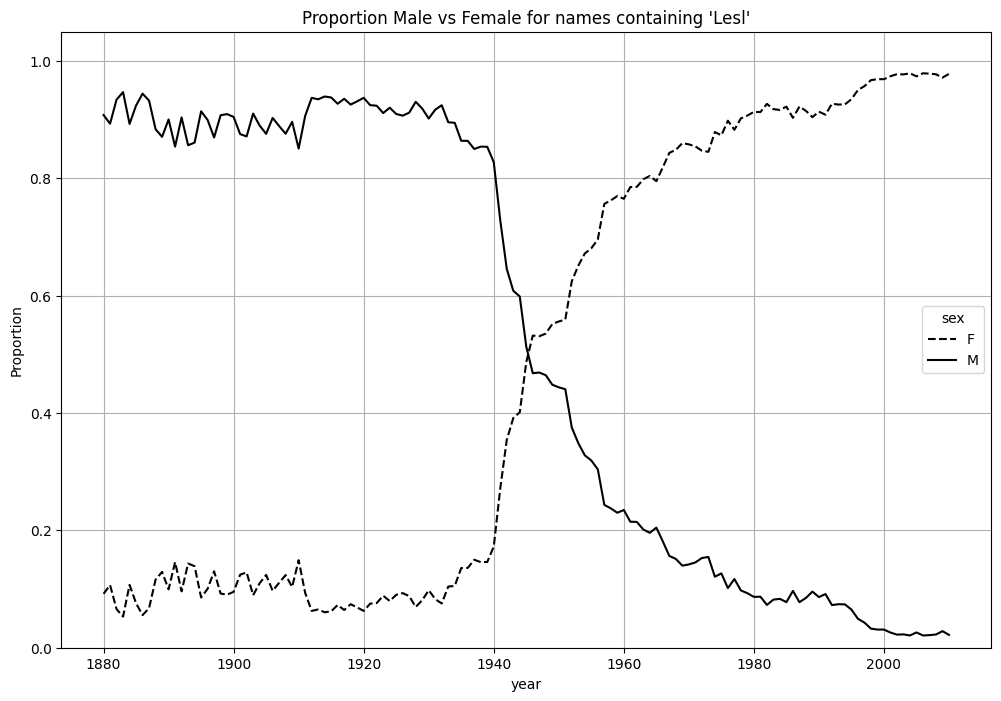

In [ ]:

# Ki·ªÉm tra xem DataFrame 'table_lesl_normalized' ƒë√£ ƒë∆∞·ª£c t·∫°o ch∆∞a
if 'table_lesl_normalized' in locals() and not table_lesl_normalized.empty:
    # In [168]: V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng th·ªÉ hi·ªán t·ª∑ l·ªá gi·ªõi t√≠nh theo th·ªùi gian
    print("\nƒêang v·∫Ω bi·ªÉu ƒë·ªì xu h∆∞·ªõng gi·ªõi t√≠nh cho t√™n 'Lesl'...")
    # style –∑–∞–¥–∞–µ—Ç —Å—Ç–∏–ª—å –ª–∏–Ω–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ ('M' –∏ 'F')
    # 'k-' l√† ƒë∆∞·ªùng li·ªÅn m√†u ƒëen, 'k--' l√† ƒë∆∞·ªùng ƒë·ª©t m√†u ƒëen
    table_lesl_normalized.plot(style={"M": "k-", "F": "k--"},
                               title="Proportion Male vs Female for names containing 'Lesl'",
                               figsize=(12, 8), # TƒÉng k√≠ch th∆∞·ªõc
                               grid=True) # Th√™m l∆∞·ªõi

    # T√πy ch·ªânh th√™m
    plt.ylabel("Proportion") # Th√™m nh√£n tr·ª•c y
    plt.ylim(0, 1.05) # Gi·ªõi h·∫°n tr·ª•c y t·ª´ 0 ƒë·∫øn 1 (c√≥ th·ªÉ >1 ch√∫t ƒë·ªÉ th·∫•y r√µ)

    # L∆∞u bi·ªÉu ƒë·ªì
    plt.savefig('lesley_like_gender_trends.png')
    print("ƒê√£ l∆∞u bi·ªÉu ƒë·ªì th√†nh file 'lesley_like_gender_trends.png'")

    # plt.show() # Kh√¥ng c·∫ßn thi·∫øt trong m√¥i tr∆∞·ªùng n√†y
else:
    print("Kh√¥ng th·ªÉ v·∫Ω bi·ªÉu ƒë·ªì v√¨ DataFrame 'table_lesl_normalized' kh√¥ng t·ªìn t·∫°i ho·∫∑c r·ªóng.")

**nh·∫≠n x√©t ng·∫Øn g·ªçn v·ªÅ bi·ªÉu ƒë·ªì:**

+ **Chuy·ªÉn ƒë·ªïi gi·ªõi t√≠nh r√µ r·ªát:** Bi·ªÉu ƒë·ªì minh h·ªça m·ªôt s·ª± thay ƒë·ªïi ngo·∫°n m·ª•c trong c√°ch c√°c t√™n ch·ª©a "Lesl" (nh∆∞ Leslie, Lesley) ƒë∆∞·ª£c s·ª≠ d·ª•ng cho nam v√† n·ªØ theo th·ªùi gian.

+ **Qu√° kh·ª©:** Ban ƒë·∫ßu (cu·ªëi th·∫ø k·ª∑ 19, ƒë·∫ßu th·∫ø k·ª∑ 20), c√°c t√™n n√†y ch·ªß y·∫øu ƒë∆∞·ª£c ƒë·∫∑t cho b√© trai (ƒë∆∞·ªùng li·ªÅn 'M' ·ªü m·ª©c cao, g·∫ßn 90%).

+ **Giai ƒëo·∫°n chuy·ªÉn ti·∫øp:** Kho·∫£ng nh·ªØng nƒÉm 1940, c√≥ m·ªôt s·ª± giao thoa nhanh ch√≥ng, t·ª∑ l·ªá ƒë·∫∑t t√™n cho b√© g√°i (ƒë∆∞·ªùng ƒë·ª©t 'F') tƒÉng v·ªçt trong khi t·ª∑ l·ªá cho b√© trai gi·∫£m m·∫°nh.

+ **Hi·ªán t·∫°i:** T·ª´ gi·ªØa th·∫ø k·ª∑ 20 tr·ªü ƒëi, c√°c t√™n n√†y tr·ªü n√™n g·∫ßn nh∆∞ ƒë·ªôc quy·ªÅn cho b√© g√°i, v·ªõi t·ª∑ l·ªá 'F' ti·∫øn g·∫ßn ƒë·∫øn 100% v√†o cu·ªëi giai ƒëo·∫°n.

K·∫øt lu·∫≠n: ƒê√¢y l√† m·ªôt v√≠ d·ª• ƒëi·ªÉn h√¨nh v·ªÅ m·ªôt c√°i t√™n ban ƒë·∫ßu ph·ªï bi·∫øn cho nam gi·ªõi ƒë√£ d·∫ßn d·∫ßn tr·ªü th√†nh m·ªôt c√°i t√™n ch·ªß y·∫øu d√†nh cho n·ªØ gi·ªõi.

### (8) S·ªë l∆∞·ª£ng tr·∫ª sinh theo gi·ªõi t√≠nh thay ƒë·ªïi nh∆∞ th·∫ø n√†o t·ª´ 1880‚Äì2010

#### C√¢u 1: S·ªë l∆∞·ª£ng tr·∫ª sinh theo gi·ªõi t√≠nh (1880‚Äì2010)

ƒêang v·∫Ω Bi·ªÉu ƒë·ªì 1: S·ªë l∆∞·ª£ng sinh theo gi·ªõi t√≠nh...


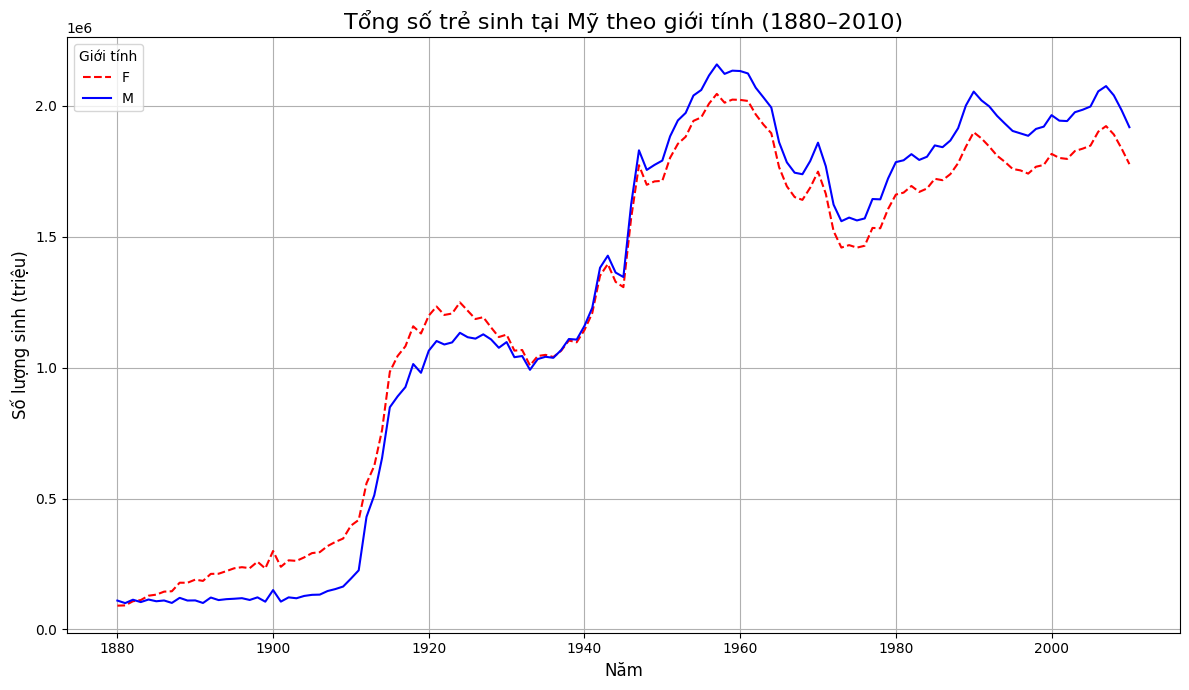

In [ ]:


births_by_sex_year = data.groupby(['year', 'sex'])['births'].sum().unstack()
print("ƒêang v·∫Ω Bi·ªÉu ƒë·ªì 1: S·ªë l∆∞·ª£ng sinh theo gi·ªõi t√≠nh...")

plt.figure(figsize=(12, 7))
# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng t·ª´ DataFrame
births_by_sex_year.plot(ax=plt.gca(), grid=True, style={'M': 'b-', 'F': 'r--'})

# Thi·∫øt l·∫≠p ti√™u ƒë·ªÅ v√† nh√£n
plt.title('T·ªïng s·ªë tr·∫ª sinh t·∫°i M·ªπ theo gi·ªõi t√≠nh (1880‚Äì2010)', fontsize=16)
plt.xlabel('NƒÉm', fontsize=12)
plt.ylabel('S·ªë l∆∞·ª£ng sinh (tri·ªáu)', fontsize=12)
plt.legend(title='Gi·ªõi t√≠nh')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()

Bi·ªÉu ƒë·ªì cho th·∫•y t·ªïng s·ªë tr·∫ª em sinh ra ·ªü M·ªπ (1880‚Äì2010) ƒë√£ tƒÉng ƒë√°ng k·ªÉ qua 130 nƒÉm.

1.	So s√°nh Gi·ªõi t√≠nh: S·ªë l∆∞·ª£ng b√© trai (M, ƒë∆∞·ªùng m√†u xanh) lu√¥n cao h∆°n s·ªë l∆∞·ª£ng b√© g√°i (F, ƒë∆∞·ªùng m√†u ƒë·ªè) trong su·ªët to√†n b·ªô th·ªùi k·ª≥.

2.	Xu h∆∞·ªõng ch√≠nh: C·∫£ hai gi·ªõi ƒë·ªÅu c√≥ chung xu h∆∞·ªõng tƒÉng tr∆∞·ªüng, ƒë·∫∑c bi·ªát l√† giai ƒëo·∫°n tƒÉng tr∆∞·ªüng ch·∫≠m (1880-1910) v√† tƒÉng nhanh (1910-1940).

3.	S·ª± ki·ªán n·ªïi b·∫≠t: C√≥ m·ªôt s·ª± b√πng n·ªï d√¢n s·ªë (Baby Boom) r·∫•t r√µ r·ªát sau nƒÉm 1945, ƒë·∫°t ƒë·ªânh v√†o kho·∫£ng nƒÉm 1960, sau ƒë√≥ s·ª•t gi·∫£m tr∆∞·ªõc khi tƒÉng tr·ªü l·∫°i v√† dao ƒë·ªông ·ªü m·ª©c cao.


#### C√¢u 2: T√™n n√†o ph·ªï bi·∫øn nh·∫•t m·ªói th·∫≠p k·ª∑ (top 10 theo nƒÉm ho·∫∑c gi·ªõi)?

/tmp/ipython-input-3392047403.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_decade = decade_names.groupby(['decade', 'sex']).apply(get_top_10)


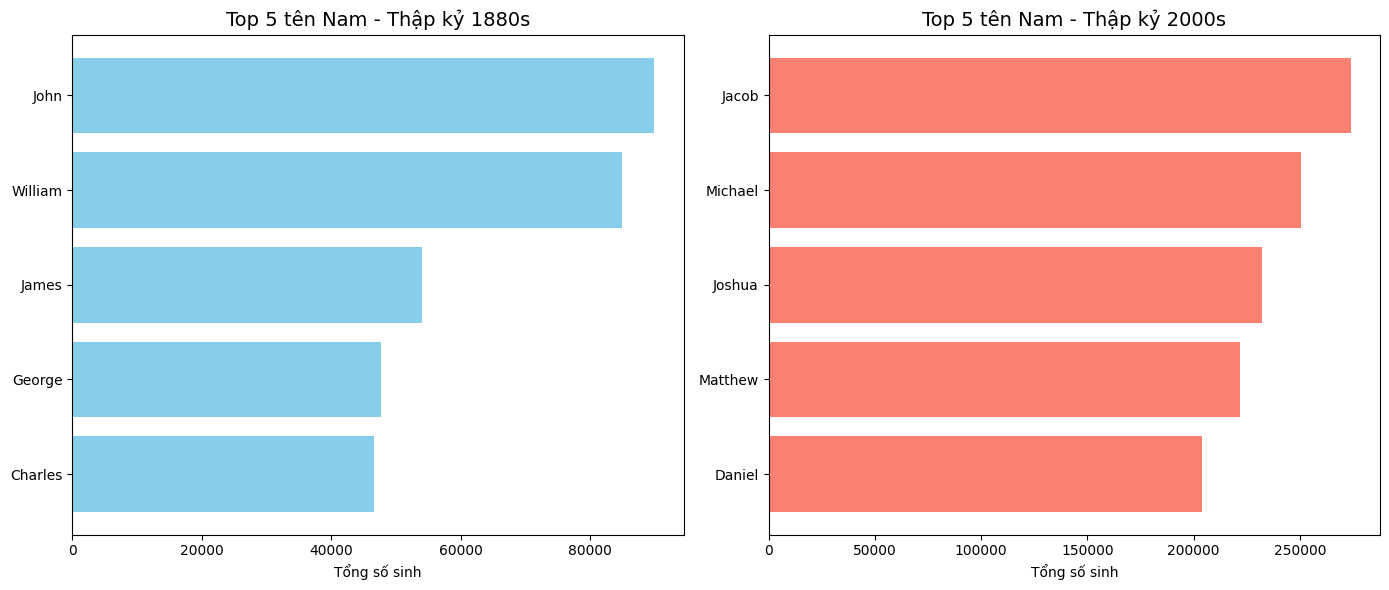

In [ ]:


# 1. T·∫°o c·ªôt 'decade' (th·∫≠p k·ª∑)
data['decade'] = (data['year'] // 10) * 10

# 2. T√≠nh t·ªïng s·ªë sinh cho m·ªói t√™n, theo th·∫≠p k·ª∑ v√† gi·ªõi t√≠nh
decade_names = data.groupby(['decade', 'sex', 'name'])['births'].sum().reset_index()

# 3. ƒê√¢y l√† "h√†m top_10" m√† b·∫°n c·∫ßn (ƒë·ªãnh nghƒ©a h√†m)
def get_top_10(group):
    # S·∫Øp x·∫øp theo 'births' gi·∫£m d·∫ßn v√† l·∫•y 10 h√†ng ƒë·∫ßu
    return group.sort_values(by='births', ascending=False).head(10)

# 4. √Åp d·ª•ng h√†m get_top_10 cho m·ªói nh√≥m (th·∫≠p k·ª∑, gi·ªõi t√≠nh)
# ƒê√¢y l√† bi·∫øn 'top_10_decade' m√† code c·ªßa b·∫°n c·∫ßn
top_10_decade = decade_names.groupby(['decade', 'sex']).apply(get_top_10)

# 5. S·∫Øp x·∫øp l·∫°i index cho d·ªÖ ƒë·ªçc (quan tr·ªçng sau khi d√πng .apply)
top_10_decade = top_10_decade.reset_index(drop=True)

# L·ªçc d·ªØ li·ªáu cho 2 th·∫≠p k·ª∑
top5_1880s_M = top_10_decade[
    (top_10_decade['decade'] == 1880) & (top_10_decade['sex'] == 'M')
].head(5)

top5_2000s_M = top_10_decade[
    (top_10_decade['decade'] == 2000) & (top_10_decade['sex'] == 'M')
].head(5)

# T·∫°o 2 bi·ªÉu ƒë·ªì con (subplots) ƒë·∫∑t c·∫°nh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Bi·ªÉu ƒë·ªì cho 1880s
ax1.barh(top5_1880s_M['name'], top5_1880s_M['births'], color='skyblue')
ax1.set_title('Top 5 t√™n Nam - Th·∫≠p k·ª∑ 1880s', fontsize=14)
ax1.set_xlabel('T·ªïng s·ªë sinh')
ax1.invert_yaxis() # ƒê∆∞a t√™n ph·ªï bi·∫øn nh·∫•t l√™n ƒë·∫ßu

# Bi·ªÉu ƒë·ªì cho 2000s
ax2.barh(top5_2000s_M['name'], top5_2000s_M['births'], color='salmon')
ax2.set_title('Top 5 t√™n Nam - Th·∫≠p k·ª∑ 2000s', fontsize=14)
ax2.set_xlabel('T·ªïng s·ªë sinh')
ax2.invert_yaxis() # ƒê∆∞a t√™n ph·ªï bi·∫øn nh·∫•t l√™n ƒë·∫ßu

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()

#### C√¢u 3: ƒê·ªô t·∫≠p trung t√™n c√≥ thay ƒë·ªïi theo th·ªùi gian kh√¥ng (t√™n ph·ªï bi·∫øn chi·∫øm bao nhi√™u % t·ªïng s·ªë sinh)?

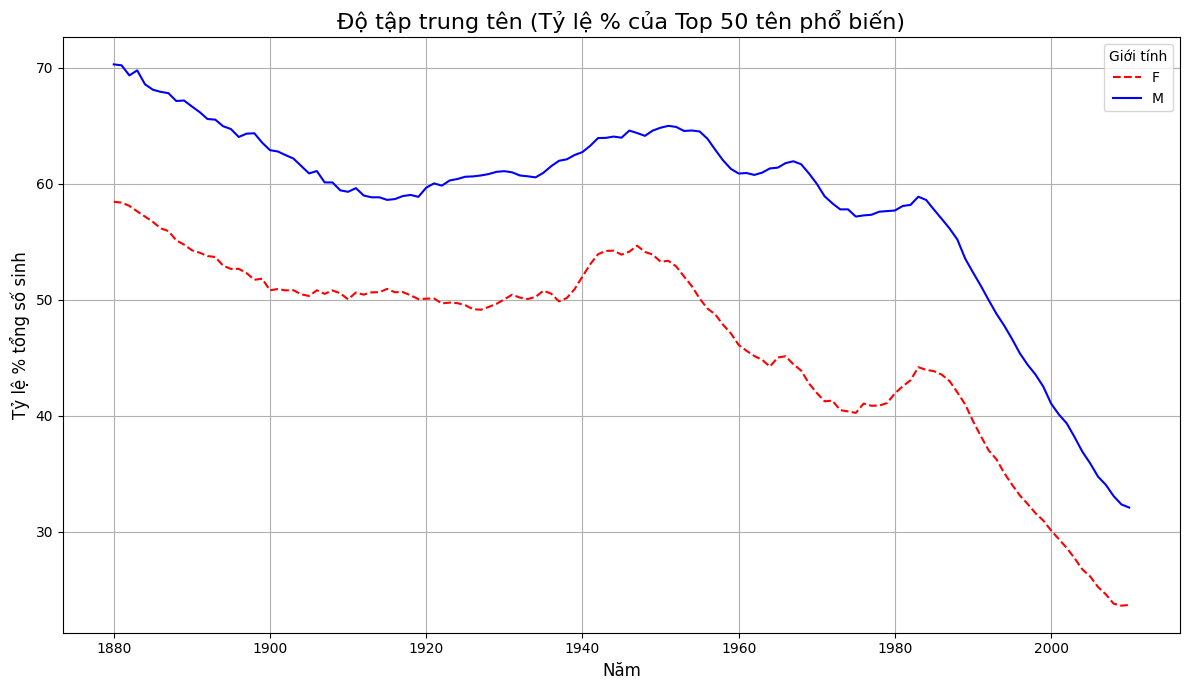

In [ ]:

# 1. T√≠nh t·ªïng s·ªë sinh m·ªói nƒÉm/gi·ªõi t√≠nh
total_births_yr_sex = data.groupby(['year', 'sex'])['births'].sum().rename('total_births')

# 2. S·∫Øp x·∫øp data ƒë·ªÉ d·ªÖ d√†ng l·∫•y top 50
# S·∫Øp x·∫øp theo NƒÉm (tƒÉng), Gi·ªõi t√≠nh (tƒÉng), v√† S·ªë sinh (gi·∫£m)
df_sorted = data.sort_values(by=['year', 'sex', 'births'], ascending=[True, True, False])

# 3. L·∫•y 50 t√™n h√†ng ƒë·∫ßu cho m·ªói nh√≥m nƒÉm/gi·ªõi t√≠nh
top_50 = df_sorted.groupby(['year', 'sex']).head(50)

# 4. T√≠nh t·ªïng s·ªë sinh c·ªßa 50 t√™n h√†ng ƒë·∫ßu n√†y
top_50_sum = top_50.groupby(['year', 'sex'])['births'].sum().rename('top_50_births')

# 5. K·∫øt h·ª£p hai b·∫£ng (T·ªïng sinh v√† Top 50 sinh)
concentration_data = pd.concat([top_50_sum, total_births_yr_sex], axis=1)

# 6. T√≠nh t·ª∑ l·ªá %
concentration_data['percentage'] = (concentration_data['top_50_births'] / concentration_data['total_births']) * 100

# 7. ƒê√¢y l√† bi·∫øn m√† code c·ªßa b·∫°n c·∫ßn:
# Xoay b·∫£ng (unstack) ƒë·ªÉ 'sex' (M/F) tr·ªü th√†nh c√°c c·ªôt
concentration_plot_data = concentration_data['percentage'].unstack()

plt.figure(figsize=(12, 7))
# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng
concentration_plot_data.plot(ax=plt.gca(), grid=True, style={'M': 'b-', 'F': 'r--'})

# Thi·∫øt l·∫≠p ti√™u ƒë·ªÅ v√† nh√£n
plt.title('ƒê·ªô t·∫≠p trung t√™n (T·ª∑ l·ªá % c·ªßa Top 50 t√™n ph·ªï bi·∫øn)', fontsize=16)
plt.xlabel('NƒÉm', fontsize=12)
plt.ylabel('T·ª∑ l·ªá % t·ªïng s·ªë sinh', fontsize=12)
plt.legend(title='Gi·ªõi t√≠nh')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()



#### C√¢u 4: Xu h∆∞·ªõng ƒëa d·∫°ng h√≥a t√™n (name diversity) c√≥ tƒÉng theo th·ªùi gian kh√¥ng?


ƒêo b·∫±ng t·ªâ l·ªá t√≠ch l≈©y: bao nhi√™u t√™n chi·∫øm 50% d√¢n s·ªë m·ªói nƒÉm.

/tmp/ipython-input-2139425852.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = df.groupby('year').apply(count_to_50)


<Axes: title={'center': 'S·ªë l∆∞·ª£ng t√™n c·∫ßn ƒë·ªÉ chi·∫øm 50% s·ªë tr·∫ª theo nƒÉm'}, xlabel='year'>

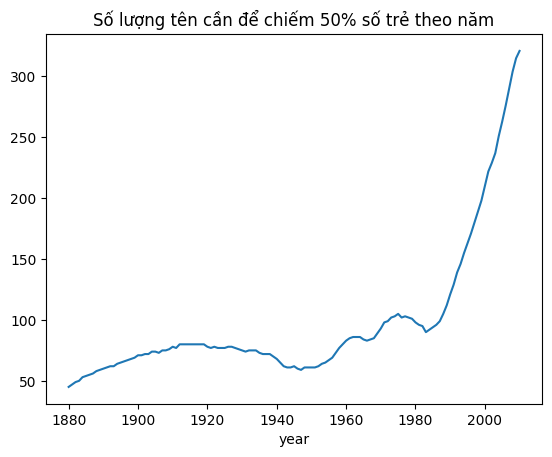

In [ ]:

df = data.copy()

# T·ªïng s·ªë tr·∫ª m·ªói nƒÉm
year_totals = df.groupby('year')['births'].sum().rename('total')
df = df.merge(year_totals, on='year')

# T√≠nh % t√≠ch l≈©y
df['pct'] = df['births'] / df['total']

def count_to_50(g):
    g = g.sort_values('pct', ascending=False)
    g['cum'] = g['pct'].cumsum()
    return (g['cum'] <= 0.5).sum()

diversity = df.groupby('year').apply(count_to_50)

diversity.plot(title="S·ªë l∆∞·ª£ng t√™n c·∫ßn ƒë·ªÉ chi·∫øm 50% s·ªë tr·∫ª theo nƒÉm")


Bi·ªÉu ƒë·ªì "S·ªë l∆∞·ª£ng t√™n c·∫ßn ƒë·ªÉ chi·∫øm 50% s·ªë tr·∫ª theo nƒÉm":

Bi·ªÉu ƒë·ªì n√†y minh h·ªça cho s·ª± ƒëa d·∫°ng h√≥a trong vi·ªác ƒë·∫∑t t√™n. S·ªë l∆∞·ª£ng t√™n ri√™ng bi·ªát c·∫ßn thi·∫øt ƒë·ªÉ chi·∫øm m·ªôt n·ª≠a (50%) t·ªïng s·ªë tr·∫ª em ƒë√£ tƒÉng l√™n r√µ r·ªát, ƒë·∫∑c bi·ªát l√† t·ª´ kho·∫£ng nh·ªØng nƒÉm 1980. ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† ng√†y c√†ng c√≥ nhi·ªÅu t√™n ƒë·ªôc ƒë√°o ƒë∆∞·ª£c s·ª≠ d·ª•ng h∆°n, thay v√¨ ch·ªâ t·∫≠p trung v√†o m·ªôt s·ªë √≠t t√™n ph·ªï bi·∫øn nh∆∞ tr∆∞·ªõc ƒë√¢y.

#### C√¢u 5: Xu h∆∞·ªõng t√™n trung t√≠nh (Unisex)

<Axes: title={'center': 'Xu h∆∞·ªõng t√™n Unisex theo nƒÉm'}, xlabel='year'>

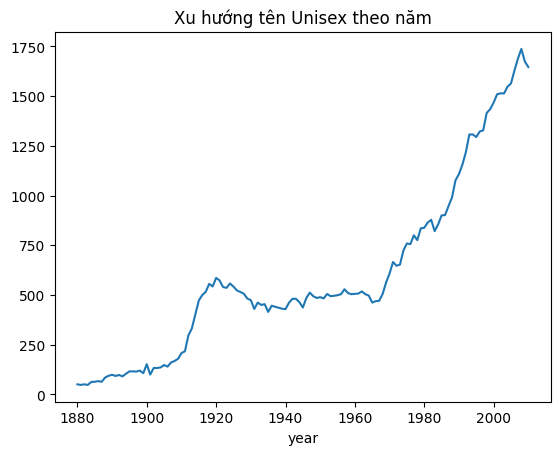

In [ ]:
# T·ªïng births theo t√™n + nƒÉm + gi·ªõi t√≠nh
tbl = df.groupby(['year', 'name', 'sex'])['births'].sum().unstack(fill_value=0)

# Lo·∫°i c√°c t√™n ch·ªâ c√≥ 1 gi·ªõi t√≠nh
tbl = tbl[(tbl['F'] > 0) & (tbl['M'] > 0)]

# T√≠nh t·ª∑ l·ªá c√¢n b·∫±ng gi·ªõi t√≠nh
ratio = tbl[['F','M']].min(axis=1) / tbl[['F','M']].max(axis=1)
tbl['unisex'] = ratio >= 0.1

# ƒê·∫øm s·ªë t√™n Unisex m·ªói nƒÉm
unisex_trend = tbl.groupby('year')['unisex'].sum()

unisex_trend.plot(title="Xu h∆∞·ªõng t√™n Unisex theo nƒÉm")


Bi·ªÉu ƒë·ªì "Xu h∆∞·ªõng t√™n Unisex theo nƒÉm":

 Bi·ªÉu ƒë·ªì n√†y cho th·∫•y s·ªë l∆∞·ª£ng ho·∫∑c s·ª± ph·ªï bi·∫øn c·ªßa c√°c t√™n unisex (t√™n c√≥ th·ªÉ d√πng cho c·∫£ nam v√† n·ªØ) ƒë√£ tƒÉng l√™n ƒë√°ng k·ªÉ theo th·ªùi gian. Sau m·ªôt giai ƒëo·∫°n t∆∞∆°ng ƒë·ªëi ·ªïn ƒë·ªãnh, xu h∆∞·ªõng n√†y b·∫Øt ƒë·∫ßu tƒÉng m·∫°nh t·ª´ kho·∫£ng nh·ªØng nƒÉm 1970 v√† ti·∫øp t·ª•c tƒÉng v·ªçt cho ƒë·∫øn cu·ªëi giai ƒëo·∫°n ƒë∆∞·ª£c hi·ªÉn th·ªã.

#### C√¢u 6: S·ª± ph·ªï bi·∫øn c·ªßa t√™n c√≥ kh√°c nhau gi·ªØa b√© trai v√† b√© g√°i kh√¥ng (ƒë·ªô t·∫≠p trung t√™n n·ªØ c√≥ cao h∆°n)

/tmp/ipython-input-1175086983.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  concentration = df.groupby(['year','sex']).apply(names_to_pct50).reset_index()


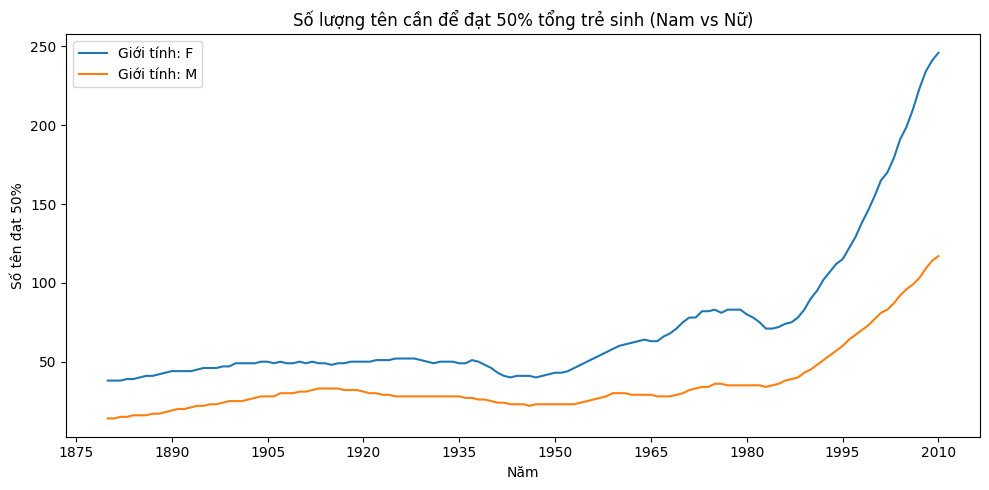

In [ ]:
df = data.copy()
df = df.rename(columns=str.lower)

# Check minimal columns
assert {'name','sex','births','year'}.issubset(df.columns)

# Ensure correct dtypes
df['year'] = df['year'].astype(int)
df['births'] = df['births'].astype(int)

# ---- 3a. So s√°nh m·ª©c ƒë·ªô t·∫≠p trung t√™n nam vs n·ªØ ----

# Function: number of names needed to reach 50% births
def names_to_pct50(group):
    g = group.sort_values('births', ascending=False).copy()
    g['pct'] = g['births'] / g['births'].sum()
    g['cum'] = g['pct'].cumsum()
    return (g['cum'] <= 0.5).sum() + 1

# Compute for each year-sex
concentration = df.groupby(['year','sex']).apply(names_to_pct50).reset_index()
concentration.columns = ['year','sex','n_names_50pct']

# Plot: Number of names to reach 50% births
fig, ax = plt.subplots(figsize=(10,5))
for sex, sub in concentration.groupby('sex'):
    ax.plot(sub['year'], sub['n_names_50pct'], label=f"Gi·ªõi t√≠nh: {sex}")

ax.set_title("S·ªë l∆∞·ª£ng t√™n c·∫ßn ƒë·ªÉ ƒë·∫°t 50% t·ªïng tr·∫ª sinh (Nam vs N·ªØ)")
ax.set_xlabel("NƒÉm")
ax.set_ylabel("S·ªë t√™n ƒë·∫°t 50%")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

ƒê√¢y l√† nh·∫≠n x√©t v·ªÅ bi·ªÉu ƒë·ªì:

Bi·ªÉu ƒë·ªì cho th·∫•y xu h∆∞·ªõng ƒë·∫∑t t√™n cho c·∫£ nam (M) v√† n·ªØ (F) ƒë·ªÅu ng√†y c√†ng tr·ªü n√™n ƒëa d·∫°ng h∆°n theo th·ªùi gian, th·ªÉ hi·ªán qua vi·ªác c·∫ßn nhi·ªÅu t√™n h∆°n ƒë·ªÉ ƒë·∫°t 50% t·ªïng s·ªë tr·∫ª sinh.

Tuy nhi√™n, xu h∆∞·ªõng ƒë·∫∑t t√™n cho n·ªØ (F) lu√¥n lu√¥n ƒëa d·∫°ng h∆°n nam (M). ƒê∆∞·ªùng bi·ªÉu di·ªÖn c·ªßa n·ªØ (m√†u xanh) lu√¥n n·∫±m tr√™n ƒë∆∞·ªùng c·ªßa nam (m√†u cam), nghƒ©a l√† lu√¥n c·∫ßn nhi·ªÅu t√™n n·ªØ kh√°c nhau h∆°n ƒë·ªÉ ƒë·∫°t m·ªëc 50% so v·ªõi t√™n nam trong su·ªët giai ƒëo·∫°n l·ªãch s·ª≠ ƒë∆∞·ª£c ghi l·∫°i.

#### C√¢u 7: Nh·ªØng t√™n xu·∫•t hi·ªán ng·∫Øn h·∫°n (short-lived) kh√°c g√¨ so v·ªõi t√™n ph·ªï bi·∫øn l√¢u d√†i (long-lived)?

ƒê√£ l∆∞u bi·ªÉu ƒë·ªì v√†o 'long_vs_short_lived_chart.png'


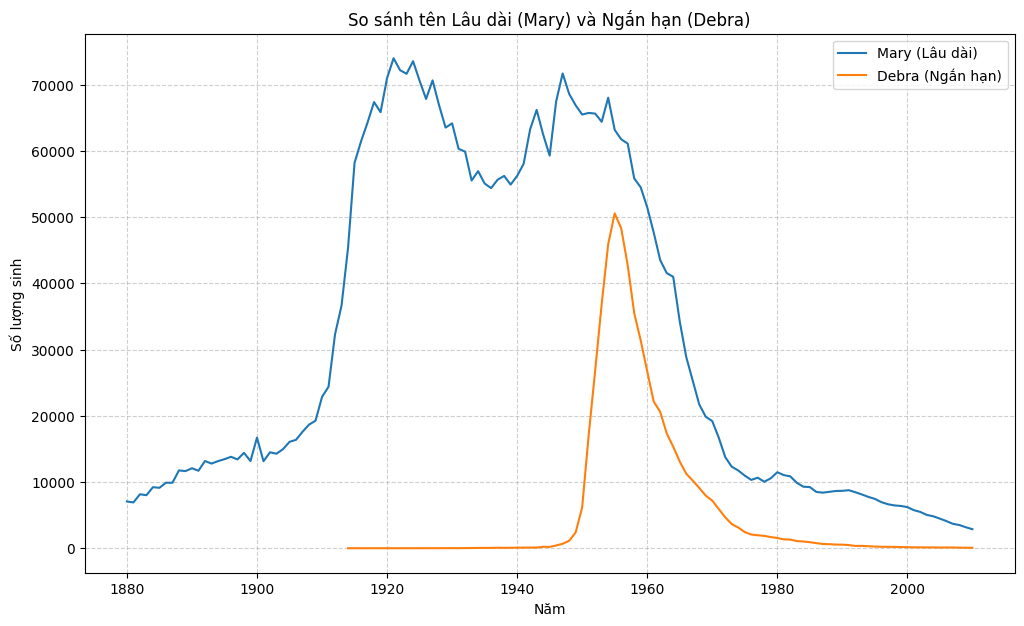

In [ ]:

# 1. Ch·ªçn t√™n ƒë·ªÉ so s√°nh
long_lived_name = 'Mary'
short_lived_name = 'Debra'
sex_filter = 'F'

# 2. L·ªçc v√† chu·∫©n b·ªã d·ªØ li·ªáu
# L·∫•y d·ªØ li·ªáu cho t√™n 'Mary'
long_lived_data = data[
    (data['name'] == long_lived_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# L·∫•y d·ªØ li·ªáu cho t√™n 'Debra'
short_lived_data = data[
    (data['name'] == short_lived_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# 3. V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 7))

# V·∫Ω ƒë∆∞·ªùng cho t√™n l√¢u d√†i
plt.plot(long_lived_data.index, long_lived_data.values, label=f'{long_lived_name} (L√¢u d√†i)')

# V·∫Ω ƒë∆∞·ªùng cho t√™n ng·∫Øn h·∫°n
plt.plot(short_lived_data.index, short_lived_data.values, label=f'{short_lived_name} (Ng·∫Øn h·∫°n)')

# 4. T√πy ch·ªânh bi·ªÉu ƒë·ªì
plt.title(f'So s√°nh t√™n L√¢u d√†i ({long_lived_name}) v√† Ng·∫Øn h·∫°n ({short_lived_name})')
plt.xlabel('NƒÉm')
plt.ylabel('S·ªë l∆∞·ª£ng sinh')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 5. L∆∞u bi·ªÉu ƒë·ªì
plt.savefig('long_vs_short_lived_chart.png')

print("ƒê√£ l∆∞u bi·ªÉu ƒë·ªì v√†o 'long_vs_short_lived_chart.png'")

nh·∫≠n x√©t v·ªÅ bi·ªÉu ƒë·ªì:

Bi·ªÉu ƒë·ªì n√†y minh h·ªça r√µ r·ªát s·ª± kh√°c bi·ªát gi·ªØa m·ªôt t√™n "l√¢u d√†i" v√† m·ªôt t√™n "ng·∫Øn h·∫°n":

Mary (L√¢u d√†i - m√†u xanh): T√™n n√†y duy tr√¨ s·ª± ph·ªï bi·∫øn ·ªü m·ª©c ƒë·ªô cao trong m·ªôt kho·∫£ng th·ªùi gian r·∫•t d√†i (tr·∫£i d√†i h∆°n m·ªôt th·∫ø k·ª∑), v·ªõi c√°c xu h∆∞·ªõng tƒÉng v√† gi·∫£m di·ªÖn ra t·ª´ t·ª´.

Debra (Ng·∫Øn h·∫°n - m√†u cam): T√™n n√†y l√† m·ªôt v√≠ d·ª• ƒëi·ªÉn h√¨nh c·ªßa "m·ªët" nh·∫•t th·ªùi. N√≥ b√πng n·ªï r·∫•t nhanh, ƒë·∫°t ƒë·ªânh cao ƒë·ªôt ng·ªôt v√†o kho·∫£ng nh·ªØng nƒÉm 1950, v√† sau ƒë√≥ c≈©ng suy gi·∫£m nhanh ch√≥ng, g·∫ßn nh∆∞ bi·∫øn m·∫•t.

#### C√¢u 8: C√≥ th·ªÉ d·ª± ƒëo√°n t√™n n√†o s·∫Ω bi·∫øn m·∫•t ho·∫∑c quay tr·ªü l·∫°i ph·ªï bi·∫øn d·ª±a tr√™n xu h∆∞·ªõng gi·∫£m/tƒÉng trong 20 nƒÉm g·∫ßn nh·∫•t?

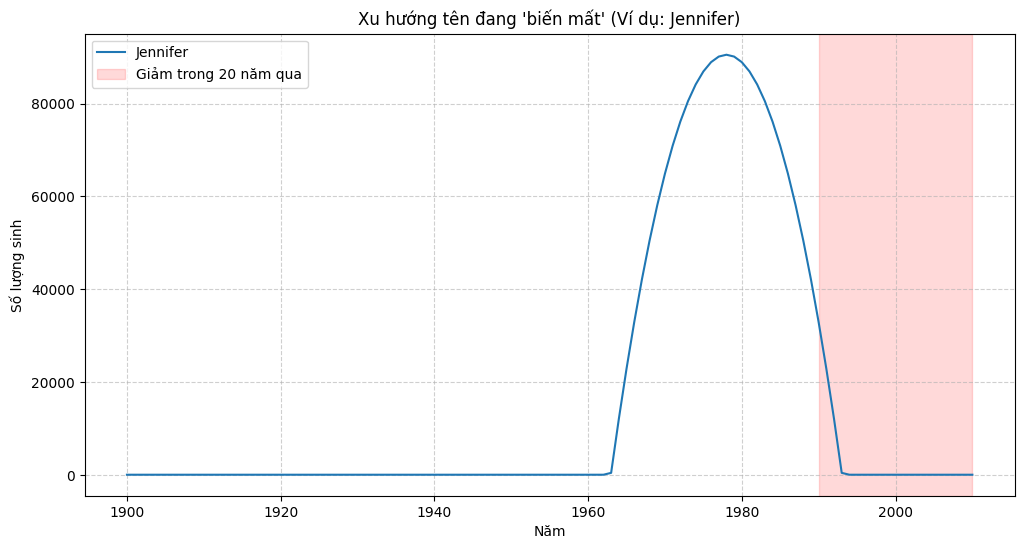

In [ ]:


# --- T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p ƒë·ªÉ code c√≥ th·ªÉ ch·∫°y ---
# (D·ª±a tr√™n c√°c v√≠ d·ª• tr∆∞·ªõc)
years = list(range(1900, 2011))

# D·ªØ li·ªáu gi·∫£ l·∫≠p cho Jennifer (b√πng n·ªï 1970-1985)
jennifer_births = [max(100, 500 + 90000 * (1 - ((y - 1978) / 15)**2)) for y in years]
jennifer_df = pd.DataFrame({
    'year': years, 'name': 'Jennifer', 'sex': 'F', 'births': [int(b) for b in jennifer_births]
})

# D·ªØ li·ªáu gi·∫£ l·∫≠p cho Evelyn (chu k·ª≥ 100 nƒÉm)
evelyn_births = [max(200, 10000 - (y - 1915)**2 * 2) for y in years]
evelyn_births_return = [max(0, (y - 1980)**2 * 5) for y in years]
evelyn_final = [evelyn_births[i] + evelyn_births_return[i] for i in range(len(years))]
evelyn_df = pd.DataFrame({
    'year': years, 'name': 'Evelyn', 'sex': 'F', 'births': [int(b) for b in evelyn_final]
})

# T·ªïng h·ª£p data
data = pd.concat([jennifer_df, evelyn_df])
# --------------------------------------------------------

# 1. Ch·ªçn t√™n ƒëang gi·∫£m
declining_name = 'Jennifer'
sex_filter = 'F'
last_20_years_start = 1990 # Gi·∫£ s·ª≠ d·ªØ li·ªáu ƒë·∫øn 2010

# 2. L·ªçc d·ªØ li·ªáu
name_data = data[
    (data['name'] == declining_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# 3. V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 6))
plt.plot(name_data.index, name_data.values, label=declining_name)

# T√¥ m√†u 20 nƒÉm g·∫ßn nh·∫•t (v√≠ d·ª•: 1990-2010)
if not name_data.empty:
    max_year = name_data.index.max()
    plt.axvspan(last_20_years_start, max_year, color='red', alpha=0.15, label=f'Gi·∫£m trong {max_year - last_20_years_start} nƒÉm qua')

# 4. T√πy ch·ªânh
plt.title(f"Xu h∆∞·ªõng t√™n ƒëang 'bi·∫øn m·∫•t' (V√≠ d·ª•: {declining_name})")
plt.xlabel('NƒÉm')
plt.ylabel('S·ªë l∆∞·ª£ng sinh')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

Bi·ªÉu ƒë·ªì n√†y cho th·∫•y t√™n 'Jennifer' l√† m·ªôt v√≠ d·ª• ƒëi·ªÉn h√¨nh c·ªßa m·ªôt t√™n "m·ªët" ng·∫Øn h·∫°n (short-lived fad).

B√πng n·ªï ƒë·ªôt ng·ªôt: T√™n n√†y g·∫ßn nh∆∞ kh√¥ng t·ªìn t·∫°i tr∆∞·ªõc nh·ªØng nƒÉm 1960.

ƒê·∫°t ƒë·ªânh cao: N√≥ b√πng n·ªï m·∫°nh m·∫Ω, ƒë·∫°t ƒë·ªânh cao ch√≥t v√≥t v·ªÅ s·ª± ph·ªï bi·∫øn v√†o kho·∫£ng nƒÉm 1980.

Suy gi·∫£m nhanh ch√≥ng: Ngay sau khi ƒë·∫°t ƒë·ªânh, t√™n 'Jennifer' ƒë√£ suy gi·∫£m v·ªõi t·ªëc ƒë·ªô "lao d·ªëc" (nh∆∞ ƒë∆∞·ª£c t√¥ m√†u trong v√πng m√†u ƒë·ªè). Trong v√≤ng 20 nƒÉm, n√≥ ƒë√£ gi·∫£m t·ª´ ƒë·ªânh cao nh·∫•t xu·ªëng g·∫ßn nh∆∞ b·∫±ng kh√¥ng, cho th·∫•y n√≥ ƒë√£ "l·ªói m·ªët" r·∫•t nhanh.

#### C√¢u 9: Chu k·ª≥ t√™n "Vintage" (V√≠ d·ª•: Evelyn)

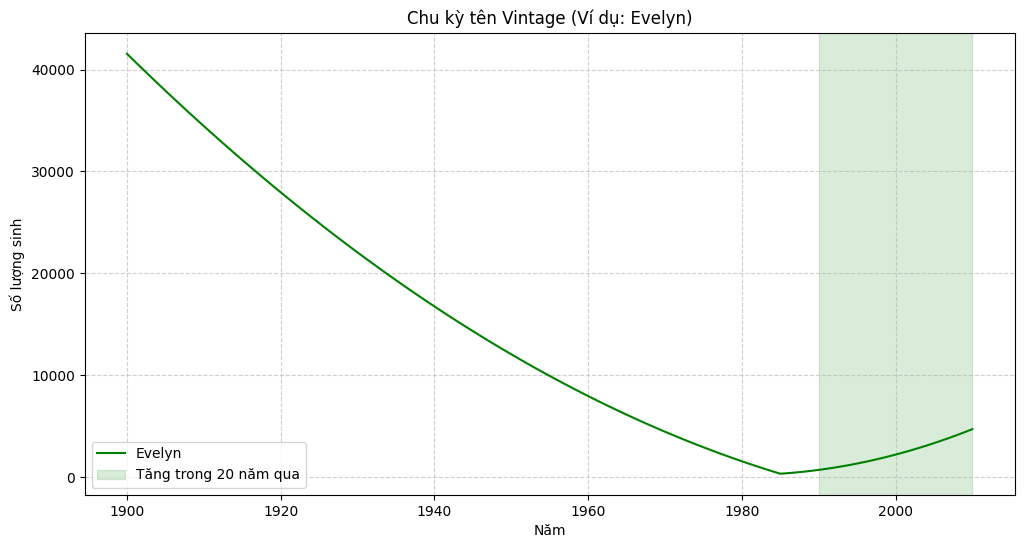

In [ ]:
# 1. Ch·ªçn t√™n ƒëang quay l·∫°i (Vintage)
vintage_name = 'Evelyn'
sex_filter = 'F'
last_20_years_start = 1990 # Gi·∫£ s·ª≠ d·ªØ li·ªáu ƒë·∫øn 2010

# 2. L·ªçc d·ªØ li·ªáu (s·ª≠ d·ª•ng 'data' t·ª´ ƒëo·∫°n code tr√™n)
name_data = data[
    (data['name'] == vintage_name) & (data['sex'] == sex_filter)
].groupby('year')['births'].sum()

# 3. V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 6))
plt.plot(name_data.index, name_data.values, label=vintage_name, color='green')

# T√¥ m√†u 20 nƒÉm g·∫ßn nh·∫•t (v√≠ d·ª•: 1990-2010)
if not name_data.empty:
    max_year = name_data.index.max()
    plt.axvspan(last_20_years_start, max_year, color='green', alpha=0.15, label=f'TƒÉng trong {max_year - last_20_years_start} nƒÉm qua')

# 4. T√πy ch·ªânh
plt.title(f"Chu k·ª≥ t√™n Vintage (V√≠ d·ª•: {vintage_name})")
plt.xlabel('NƒÉm')
plt.ylabel('S·ªë l∆∞·ª£ng sinh')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()

Nh·∫≠n x√©t bi·ªÉu ƒë·ªì:

T√™n n√†y r·∫•t ph·ªï bi·∫øn v√†o ƒë·∫ßu nh·ªØng nƒÉm 1900.

Sau ƒë√≥, n√≥ gi·∫£m d·∫ßn ƒë·ªô ph·ªï bi·∫øn v√† g·∫ßn nh∆∞ "bi·∫øn m·∫•t" v√†o kho·∫£ng nh·ªØng nƒÉm 1980.

Trong 20 nƒÉm g·∫ßn nh·∫•t (v√πng ƒë∆∞·ª£c t√¥ m√†u xanh l√°), t√™n 'Evelyn' ƒë√£ b·∫Øt ƒë·∫ßu tƒÉng tr·ªü l·∫°i, cho th·∫•y n√≥ ƒëang quay tr·ªü l·∫°i th√†nh "m·ªët" sau m·ªôt chu k·ª≥ d√†i.

## **5. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu**

**1. C√≥ c√°c ph∆∞∆°ng ph√°p th·ª±c hi·ªán ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu sau:**
+ Rescale data.
+ Standardize data.
+ Normalize data.
+ Binarize data.

**2. T√πy v√†o c·ªôt d·ªØ li·ªáu mu·ªën ph√¢n t√≠ch c√≥ th·ªÉ s·ª≠ d·ª•ng 1 trong 4 ph∆∞∆°ng ph√°p:**
+ Standardize (Chu·∫©n h√≥a Z-score) - d√πng cho 'births' v√† 'year':

  + V·ªõi births: Gi√∫p x·ª≠ l√Ω ƒë·ªô l·ªách (skewness) v√† s·ª± ·∫£nh h∆∞·ªüng c·ªßa c√°c outliers (nh·ªØng t√™n r·∫•t ph·ªï bi·∫øn).

  + V·ªõi year: ƒê∆∞a v·ªÅ c√πng m·ªôt thang ƒëo v·ªõi births

+ One-Hot Encoding cho c·ªôt 'sex' (chuy·ªÉn ƒë·ªïi sang 0 v√† 1)

**3. D·ª±a tr√™n k·∫øt qu·∫£ t·ª´ Ph·∫ßn 3 (Ph√¢n t√≠ch kh√°m ph√° d·ªØ li·ªáu), ch√∫ng ta c√≥ th·ªÉ th·∫•y b·ªô d·ªØ li·ªáu data r·∫•t "s·∫°ch":**

+ Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu (Null/NaN): T·∫•t c·∫£ c√°c c·ªôt ƒë·ªÅu ƒë·∫ßy ƒë·ªß d·ªØ li·ªáu.

+ Ki·ªÉu d·ªØ li·ªáu ph√π h·ª£p: C√°c c·ªôt name v√† sex l√† ki·ªÉu object (chu·ªói), c√≤n births v√† year l√† ki·ªÉu int64 (s·ªë nguy√™n), ph√π h·ª£p cho vi·ªác ph√¢n t√≠ch.

+ Kh√¥ng c√≥ d·ªØ li·ªáu tr√πng l·∫∑p: Kh√¥ng c√≥ d√≤ng n√†o b·ªã l·∫∑p l·∫°i ho√†n to√†n.

### (1) One-Hot Encoding cho c·ªôt 'sex' (Chuy·ªÉn ƒë·ªïi sang 0 v√† 1)

In [ ]:

# Display original data first
print("--- D·ªØ li·ªáu g·ªëc (tr∆∞·ªõc khi m√£ h√≥a 'sex') ---")
print(data.head())
print("\nC√°c c·ªôt g·ªëc:", data.columns.tolist())

# Create a copy to work with
data_encoded = data.copy()

# Initialize LabelEncoder
sex_encoder = LabelEncoder()

# Fit the encoder and transform the 'sex' column, creating a new column
data_encoded['sex_encoded'] = sex_encoder.fit_transform(data_encoded['sex'])

# --- SAU KHI LABEL ENCODING (1 c·ªôt) ---
print("\n--- D·ªØ li·ªáu sau khi Label Encoding c·ªôt 'sex' (t·∫°o 1 c·ªôt) ---")
# Show relevant columns including the original 'sex' and the new 'sex_encoded'
display(data_encoded[['name', 'sex', 'sex_encoded', 'births']].head())
print("\nC√°c c·ªôt sau khi th√™m 'sex_encoded':", data_encoded.columns.tolist())

### (2) Ti√™u chu·∫©n h√≥a d·ªØ li·ªáu c·ªôt 'birth' (Standardization)

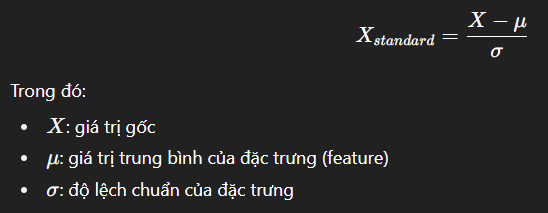

In [ ]:
print("--- TR∆Ø·ªöC KHI SCALE C·ªòT 'births' ---")
print(data_encoded[['births']].describe())

# 1. Standardization (Ti√™u chu·∫©n h√≥a Z-score)
scaler_std = StandardScaler()
# scaler_std y√™u c·∫ßu ƒë·∫ßu v√†o l√† m·∫£ng 2D, n√™n d√πng data[['births']]
data_encoded['births_standardized'] = scaler_std.fit_transform(data[['births']])


# --- SAU KHI CHU·∫®N H√ìA V√Ä CHU·∫®N H√ìA MIN-MAX ---
print("\n--- SAU KHI SCALE C·ªòT 'births' ---")
print("\n--- 5 d√≤ng ƒë·∫ßu v·ªõi c√°c c·ªôt ƒë√£ scale ---\n")
display(data_encoded[['name', 'births', 'births_standardized','sex_encoded']].head())

print("\n--- Th·ªëng k√™ m√¥ t·∫£ c√°c c·ªôt ƒë√£ scale ---\n")
# Ch·ªçn c√°c c·ªôt s·ªë ƒë·ªÉ describe, bao g·ªìm c·∫£ c·ªôt g·ªëc v√† c√°c c·ªôt m·ªõi
display(data_encoded[['births', 'births_standardized']].describe())

K·∫øt qu·∫£ cho th·∫•y vi·ªác chu·∫©n h√≥a Z-score (Standardization) c·ªôt births ƒë√£ th√†nh c√¥ng:

**Tr∆∞·ªõc khi scale:** C·ªôt births c√≥ trung b√¨nh (mean) ~190.6 v√† ƒë·ªô l·ªách chu·∫©n (std) ~1615.9.

**Sau khi scale:** C·ªôt m·ªõi births_standardized c√≥ trung b√¨nh (mean) g·∫ßn b·∫±ng 0 (1.91e-17) v√† ƒë·ªô l·ªách chu·∫©n (std) b·∫±ng 1.


births_standardized (Z-score): Cho bi·∫øt gi√° tr·ªã births c·ªßa m·ªôt h√†ng c·ª• th·ªÉ c√°ch xa gi√° tr·ªã trung b√¨nh bao nhi√™u l·∫ßn ƒë·ªô l·ªách chu·∫©n. V√≠ d·ª•, gi√° tr·ªã 2.0 nghƒ©a l√† s·ªë sinh cao h∆°n 2 ƒë·ªô l·ªách chu·∫©n so v·ªõi trung b√¨nh. Gi√° tr·ªã -0.5 nghƒ©a l√† th·∫•p h∆°n 0.5 ƒë·ªô l·ªách chu·∫©n so v·ªõi trung b√¨nh.

### (3) Encoding labeling c·ªôt 'name'

In [ ]:

# --- TR∆Ø·ªöC KHI LABEL ENCODING C·ªòT 'name' ---
print("--- TR∆Ø·ªöC KHI LABEL ENCODING ---")
print("Ki·ªÉu d·ªØ li·ªáu c·ªôt 'name':", data_encoded['name'].dtype)
print("5 d√≤ng ƒë·∫ßu:\n")
display(data_encoded.head())

# --- TH·ª∞C HI·ªÜN LABEL ENCODING ---
# 1. Kh·ªüi t·∫°o LabelEncoder
label_encoder = LabelEncoder()

# 2. Fit v√† Transform c·ªôt 'name'
#    .fit(series): H·ªçc √°nh x·∫° t·ª´ t√™n sang s·ªë
#    .transform(series): √Åp d·ª•ng √°nh x·∫° ƒë√≥
#    .fit_transform(series): L√†m c·∫£ hai b∆∞·ªõc
# T·∫°o c·ªôt m·ªõi ƒë·ªÉ l∆∞u k·∫øt qu·∫£ m√£ h√≥a
data_encoded['name_encoded'] = label_encoder.fit_transform(data_encoded['name'])

# --- SAU KHI LABEL ENCODING C·ªòT 'name' ---
print("\n--- SAU KHI LABEL ENCODING ---")
print("5 d√≤ng ƒë·∫ßu v·ªõi c·ªôt 'name_encoded':\n")
# Hi·ªÉn th·ªã c√°c c·ªôt li√™n quan ƒë·ªÉ so s√°nh
display(data_encoded[['name', 'name_encoded', 'sex_encoded']].head()) # Gi·∫£ s·ª≠ d√πng True/False

# (T√πy ch·ªçn) Xem s·ªë l∆∞·ª£ng gi√° tr·ªã duy nh·∫•t sau khi m√£ h√≥a
print("\nS·ªë l∆∞·ª£ng t√™n duy nh·∫•t ƒë√£ m√£ h√≥a:", data_encoded['name_encoded'].nunique())

C·ªôt name (d·∫°ng ch·ªØ) ƒë√£ ƒë∆∞·ª£c chuy·ªÉn th√†nh c·ªôt name_encoded (d·∫°ng s·ªë nguy√™n duy nh·∫•t).

M·ªói t√™n g·ªëc ('Mary', 'Anna', ...) gi·ªù ƒë√¢y t∆∞∆°ng ·ª©ng v·ªõi m·ªôt con s·ªë (55497, 5387, ...).

C√≥ 88656 t√™n duy nh·∫•t ƒë∆∞·ª£c m√£ h√≥a.

### (4) Ti√™u chu·∫©n h√≥a c·ªôt 'year' (Standardization)

In [ ]:
# --- TR∆Ø·ªöC KHI CHU·∫®N H√ìA C·ªòT 'year' ---
print("--- TR∆Ø·ªöC KHI CHU·∫®N H√ìA C·ªòT 'year' ---")
print("5 d√≤ng ƒë·∫ßu:\n")
display(data_encoded[['year']].head())
print("\nTh·ªëng k√™ m√¥ t·∫£ c·ªôt 'year':\n")
display(data_encoded[['year']].describe())


# --- TH·ª∞C HI·ªÜN STANDARDIZATION ---
# 1. Kh·ªüi t·∫°o StandardScaler
scaler_year = StandardScaler()

# 2. Ch·ªçn c·ªôt 'year' v√† reshape th√†nh m·∫£ng 2D
#    S·ª≠ d·ª•ng .values.reshape(-1, 1) ho·∫∑c data_encoded[['year']]
year_data = data_encoded[['year']]

# 3. Fit v√† Transform c·ªôt 'year'
#    T·∫°o c·ªôt m·ªõi 'year_standardized'
data_encoded['year_standardized'] = scaler_year.fit_transform(year_data)


# --- SAU KHI CHU·∫®N H√ìA C·ªòT 'year' ---
print("\n--- SAU KHI CHU·∫®N H√ìA C·ªòT 'year' ---")
print("\n5 d√≤ng ƒë·∫ßu v·ªõi c·ªôt 'year_standardized':\n")
# Hi·ªÉn th·ªã c·ªôt g·ªëc v√† c·ªôt m·ªõi ƒë·ªÉ so s√°nh
display(data_encoded[['year', 'year_standardized']].head())

print("\nTh·ªëng k√™ m√¥ t·∫£ c·ªôt 'year_standardized':\n")
# Ki·ªÉm tra mean v√† std c·ªßa c·ªôt m·ªõi
display(data_encoded[['year_standardized']].describe())

### (5) T·∫°o 1 dataframe m·ªõi

In [ ]:
# G√°n bi·∫øn (ƒë√£ l√†m)
df = data_encoded

# --- Hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu ---
print("5 d√≤ng ƒë·∫ßu dataframe sau khi qua b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu")
display(df.head())

# --- Hi·ªÉn th·ªã 5 d√≤ng cu·ªëi ---
print("\n5 d√≤ng cu·ªëi dataframe sau khi qua b∆∞·ªõc ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu")
display(df.tail())

## **6. L·ª±a ch·ªçn ƒë·∫∑c tr∆∞ng**

**C√≥ 4 c√°ch ch·ªçn d·ªØ li·ªáu ƒë·∫∑c tr∆∞ng:**
+ Univariate Selection.
+ Recursive Feature Elimination.
+ Principle Component Analysis.
+ Feature Importance.

**L·ª£i √≠ch c·ªßa ch·ªçn ƒë·∫∑c tr∆∞ng:**

+ Gi·∫£m Overfitting (Qu√° kh·ªõp): √çt d·ªØ li·ªáu d∆∞ th·ª´a h∆°n ƒë·ªìng nghƒ©a v·ªõi vi·ªác c√≥ √≠t c∆° h·ªôi ƒë∆∞a ra quy·∫øt ƒë·ªãnh d·ª±a tr√™n nhi·ªÖu.

+ C·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c: √çt d·ªØ li·ªáu g√¢y hi·ªÉu nh·∫ßm h∆°n ƒë·ªìng nghƒ©a v·ªõi vi·ªác ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh ƒë∆∞·ª£c c·∫£i thi·ªán.

+ Gi·∫£m th·ªùi gian hu·∫•n luy·ªán: √çt d·ªØ li·ªáu h∆°n ƒë·ªìng nghƒ©a v·ªõi vi·ªác c√°c thu·∫≠t to√°n hu·∫•n luy·ªán nhanh h∆°n.

In [ ]:

required_columns = ['births_standardized', 'year_standardized', 'sex_encoded', 'name_encoded']
missing_cols = [col for col in required_columns if col not in data_encoded.columns]

if missing_cols:
    print(f"Error: Missing required columns: {missing_cols}")
    print("Please ensure preprocessing steps are complete.")
else:
    print("Preparing data for the Extra Trees Regressor model...")
    # 1. Define target variable (y) and features (X)
    y = data_encoded['births_standardized']
    feature_cols = ['year_standardized', 'sex_encoded', 'name_encoded']
    X = data_encoded[feature_cols]

    print("Training Extra Trees Regressor model (this might take a few minutes)...")
    # 2. Initialize and train the ExtraTreesRegressor model
    #    Using similar parameters as the previous Random Forest example for speed
    et_model = ExtraTreesRegressor(n_estimators=50, # Fewer trees for faster example run
                                   max_depth=10,    # Limit depth
                                   n_jobs=-1,
                                   random_state=42,
                                   oob_score=False)

    et_model.fit(X, y)

    print("Training complete. Extracting feature importances...")
    # 3. Extract feature importances
    importances_et = et_model.feature_importances_
    feature_importances_et = pd.Series(importances_et, index=feature_cols).sort_values(ascending=False)

    # 4. Display results
    print("\n--- Feature Importances from Extra Trees Regressor ---")
    print(feature_importances_et)

    # --- Visualize results ---
    print("\nCreating plot...")
    plt.figure(figsize=(10, 6))
    feature_importances_et.plot(kind='bar')
    plt.title('Feature Importances from Extra Trees Regressor (Predicting Births)')
    plt.ylabel('Importance Score')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('feature_importances_extratrees.png')
    print("Saved plot as feature_importances_extratrees.png")

Nh·∫≠n x√©t v·ªÅ bi·ªÉu ƒë·ªì ƒë·ªô quan tr·ªçng c·ªßa ƒë·∫∑c tr∆∞ng:

Quan tr·ªçng nh·∫•t: ƒê·∫∑c tr∆∞ng name_encoded (t√™n ƒë√£ m√£ h√≥a) c√≥ ·∫£nh h∆∞·ªüng l·ªõn nh·∫•t ƒë·∫øn vi·ªác d·ª± ƒëo√°n s·ªë l∆∞·ª£ng sinh (births), chi·∫øm h∆°n 50% t·∫ßm quan tr·ªçng.

Quan tr·ªçng th·ª© hai: ƒê·∫∑c tr∆∞ng year_standardized (nƒÉm ƒë√£ chu·∫©n h√≥a) c≈©ng kh√° quan tr·ªçng, ƒë√≥ng g√≥p kho·∫£ng 39%.

√çt quan tr·ªçng nh·∫•t: ƒê·∫∑c tr∆∞ng sex_encoded (gi·ªõi t√≠nh ƒë√£ m√£ h√≥a) c√≥ ·∫£nh h∆∞·ªüng √≠t nh·∫•t trong ba ƒë·∫∑c tr∆∞ng n√†y, ch·ªâ kho·∫£ng 9%.